# 패키지 설치
#!pip install --upgrade pymilvus "pymilvus[model]"
#!pip install openpyxl

In [2]:
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
src_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))
if src_dir not in sys.path:
    sys.path.append(src_dir)
from modules.preprocess import *

# File load

In [3]:
tracker_info=pd.read_excel("../../data/tacker_Info.xlsx", header=1)
model_df=pd.read_excel("../../data/250224 model_STD.xlsx")
maker_df=pd.read_excel("../../data/250224 maker_STD.xlsx")

/workspace/Large_languige_model/.venv/lib/python3.10/site-packages/openpyxl/worksheet/_reader.py:223: UserWarning: Cell S424169 is marked as a date but the serial value 2200002640 is outside the limits for dates. The cell will be treated as an error.
  warn(msg)
/workspace/Large_languige_model/.venv/lib/python3.10/site-packages/openpyxl/worksheet/_reader.py:223: UserWarning: Cell F506984 is marked as a date but the serial value 1000039148 is outside the limits for dates. The cell will be treated as an error.
  warn(msg)


- 스탠다드 모델의 전체 갯수는 385,613개이다. (장비와 파츠 포함)
- stardard 데이터임에도 null값이 많이 보인다.

In [4]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385613 entries, 0 to 385612
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   modelID       385613 non-null  object
 1   modelSTDName  385610 non-null  object
 2   MakerID       385612 non-null  object
 3   modelAlias    385599 non-null  object
 4   category      385612 non-null  object
dtypes: object(5)
memory usage: 14.7+ MB


 # 카테고리 이름
 - Category_Code         
 - Category_Name         
 - MAKER_ID              메이커 ID
 - MAKER_NAME            메이커 이름과 매칭되어 maker_id 부여
 - MODEL_ID              모델 ID 
 - MODEL_NAME            모델 name alias와 매칭되어 model ID 부텨
 - Process_NM            
 - Configuration         제품 상태정보
 - SERIAL_NO             
 - VINTAGE               생산년도
 - Tracker_availability  추적가능?
 - Seller                파는업체
 - Owner                 소유하고 있는곳
 - USER_FAB_ID           ??
 - COUNTRY_CD            국가코드
 - P&C                   ??
 - CODE                  ??
 - STD_MODEL_YN          stardard 모델과 매칭(Y), 안되었을때 (N)
 - STD_MAKER_YN          stardard 메이커와 매칭(Y), 안되었을때 (N)
 - Process(model Info)   ??
 - config(model Info)    configuration과 무슨차이(??)

In [5]:
tracker_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 674744 entries, 0 to 674743
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Category_Code         641541 non-null  object
 1   Category_Name         641540 non-null  object
 2   MAKER_ID              674743 non-null  object
 3   MAKER_NAME            674157 non-null  object
 4   MODEL_ID              674744 non-null  object
 5   MODEL_NAME            674469 non-null  object
 6   Process_NM            400948 non-null  object
 7   Configuration         397434 non-null  object
 8   SERIAL_NO             165769 non-null  object
 9   VINTAGE               105469 non-null  object
 10  Tracker_availability  674740 non-null  object
 11  Seller                663163 non-null  object
 12  Owner                 606403 non-null  object
 13  USER_FAB_ID           468 non-null     object
 14  COUNTRY_CD            388412 non-null  object
 15  P&C              

In [6]:
tracker_info

Category_Code      Category_Name  MAKER_ID  \
0          GENERAL_TESTER     General Tester      MA45   
1        REFLOW_SOLDERING   Reflow&Soldering     MA752   
2       PRINTER_DISPENSER  Printer&Dispenser     MA881   
3            CHIP_MOUNTER       Chip Mounter     MA740   
4              DICING_SAW         Dicing Saw     MA522   
...                   ...                ...       ...   
674739           PARTS_PC        Part Others     MA110   
674740           PARTS_PC        Part Others  MA262092   
674741           PARTS_PC        Part Others     MA110   
674742           PARTS_PC        Part Others  MA283519   
674743           PARTS_PC        Part Others  MA283519   

                             MAKER_NAME  MODEL_ID        MODEL_NAME  \
0                             Advantest    MO6491             8595E   
1                              Furukawa    MO6845      XNIII-725PCG   
2                               Hitachi    MO2604          TPM-1100   
3                                  Fuji     MO588           CP-842E   
4                                 Disco     MO719            DFD640   
...                                 ...       ...               ...   
674739                             AMAT  MO400396        0150-20124   
674740                              TEL  MO659810  ES3D05-200162-12   
674741                             AMAT  MO400983        0200-35051   
674742  PARKER HANNIFIN CORP-COMPUMOTOR  MO797121        SVC2195M-7   
674743  PARKER HANNIFIN CORP-COMPUMOTOR  MO797120       SVC2195M6-7   

               Process_NM                                      Configuration  \
0       Spectrum Analyzer                                                NaN   
1            Reflow oven_                                                NaN   
2          Screen Printer                                                NaN   
3            Chip mounter                                                NaN   
4               Wafer Saw                             Including CSP Function   
...                   ...                                                ...   
674739                NaN  Qty : 2 / Title : Applied Materials (AMAT) 015...   
674740                NaN  Qty : 5 / Title : TEL ES3D05-200162-12 Ring, Q...   
674741                NaN  Qty : 3 / Title : Applied Materials (AMAT) 020...   
674742                NaN  Qty : 6 / Title : PARKER SVC2195M-7 VALVE SING...   
674743                NaN  Qty : 2 / Title : PARKER SVC2195M6-7 VALVE SIN...   

           SERIAL_NO VINTAGE  ...  \
0         4115A05086    2001  ...   
1             X04597    2000  ...   
2       667609AF6838    1996  ...   
3                538    2004  ...   
4             EL1403    1996  ...   
...              ...     ...  ...   
674739           NaN     NaN  ...   
674740           NaN     NaN  ...   
674741           NaN     NaN  ...   
674742           NaN     NaN  ...   
674743           NaN     NaN  ...   

                                                  Seller  \
0                                         Index Solution   
1                                    JINUTEC CORPORATION   
2        Kunshan Wospring Electronics Technology Co.,Ltd   
3                                                    DHC   
4                                               SEMI RUN   
...                                                  ...   
674739                     Capitol Area Technology, LLC.   
674740                     Capitol Area Technology, LLC.   
674741                     Capitol Area Technology, LLC.   
674742                     Capitol Area Technology, LLC.   
674743                     Capitol Area Technology, LLC.   

                                                   Owner USER_FAB_ID  \
0                                      DOULTECH Co., Ltd         NaN   
1                                    JINUTEC CORPORATION         NaN   
2        Kunshan Wospring Electronics Technology Co.,Ltd         NaN   
3                                              

# 1. 전처리

In [7]:
# 카테고리로 포함되는 값 확인
model_df["category"].value_counts().keys()

Index(['Part Others', 'MFC & LFC', 'Metrology', 'PKG ETC', 'Pump', 'Valve',
       'Fab Others', 'Motion Control', 'PCBs', 'RF', 'ATE ETC', 'Etch',
       'Chuck & Pedestal', 'Tester', 'WET', 'SMT ETC', 'Furnace',
       'General Tester', 'Track', 'Robot', 'Stepper', 'Chip Mounter', 'CVD',
       'Process Kit', 'PVD', 'Prober', 'Display', 'Scanner', 'Die Bonder',
       'Asher', 'Wire Bonder', 'Chiller & Scrubber', 'Gauge', 'Handler',
       'Dicing Saw', 'Microscope', 'Plastic Processing',
       'CMP Parts & Consumables', 'Implant', 'Printer&Dispenser', 'RTP',
       'Reflow&Soldering', 'Inspection', 'Back Grinder', 'CMP', 'Medical',
       'Laser', 'ECD', 'MoCVD', 'Other Industry > Other', 'PCB Equip', 'Solar',
       'LCD', 'Wafer', 'Auto Inserter', 'Others', 'Metalworking', 'Packaging'],
      dtype='object', name='category')

- 장비 카테고리 : 'Asher', 'CMP', 'CVD', 'ECD', 'Etch', 'Furnace', 'Implant', 'Metrology','PVD', 'RTP', 'Stepper', 
                    'Scanner', 'Track', 'WET', 'MoCVD', 'Fab Others', 'Prober','Handler','Tester','ATE ETC','Packaging',
                    'Dicing Saw','Wire Bonder','Die Bonder','Back Grinder','PKG ETC','Chip Mounter','Reflow&Soldering',
                    'Inspection','Auto Inserter','SMT ETC' 
- parts 카테고리 : 'PCBs', 'RF', 'CMP Parts & Consumables', 'Motion Control', 'Robot', 'Chuck & Pedestal', 'Process Kit', 
                'MFC & LFC', 'Gauge', 'Valve', 'Laser', 'Pump', 'Chiller & Scrubber', 'Part Others'
- 기타 카테고리 : 'General Tester','Microscope', 'Plastic Processing','Printer&Dispenser', 'Medical','Other Industry > Other',
                  'PCB Equip', 'Solar','LCD', 'Wafer', 'Others', 'Metalworking'



- standard 모델에도 nan값과 정리가 안된 파일들이 섞여있음
- hanna와 이야기 등록과정에서 이상한값들이 발생할수 있는데 목록공유해서 수정하도록 요청
- cem 팀에서는 중복은 1% 안될것이라고 하였으나 예상 수치는 전체에서 100개 정도 예상...

# model

In [9]:
# alias가 없는 경우 standard name으로 대체
model_df['modelAlias'] = model_df['modelAlias'].fillna(model_df['modelSTDName'])
model_df['modelSTDName'] = model_df['modelSTDName'].fillna(model_df['modelAlias'])


In [10]:
model_df["modelSTDName"] = model_df["modelSTDName"].apply(clean_unknown_to_empty)
model_df["modelAlias"] = model_df["modelAlias"].apply(clean_unknown_to_empty)
model_df.isna().sum()

modelID         0
modelSTDName    0
MakerID         1
modelAlias      0
category        1
dtype: int64

In [11]:
# na 값 삭제
model_df.dropna(inplace=True)
precessed_model_df = model_df.astype(str)
precessed_model_df.isna().sum()

modelID         0
modelSTDName    0
MakerID         0
modelAlias      0
category        0
dtype: int64

# maker

In [12]:
# alias가 없는 경우 standard name으로 대체
maker_df['makerAlias'] = maker_df['makerAlias'].fillna(maker_df['makerSTDName'])
model_df['makerSTDName'] = maker_df['makerSTDName'].fillna(maker_df['makerAlias'])

maker_df["makerSTDName"] = maker_df["makerSTDName"].apply(clean_unknown_to_empty)
maker_df["makerAlias"] = maker_df["makerAlias"].apply(clean_unknown_to_empty)

maker_df.isna().sum()

makerID           0
makerSTDName      0
makerAlias        0
CLEAN_MAKER_NM    0
dtype: int64

In [13]:
# na 값 삭제
maker_df.dropna(inplace=True)
precessed_maker_df = maker_df.astype(str)
precessed_maker_df.isna().sum()

makerID           0
makerSTDName      0
makerAlias        0
CLEAN_MAKER_NM    0
dtype: int64

In [14]:
precessed_model_df = precessed_model_df.merge(precessed_maker_df[["makerID","makerAlias","makerSTDName"]], left_on="MakerID", right_on="makerID", how="left")
precessed_model_df = precessed_model_df.drop(columns=["makerID"])
# 아래 코드는 alias와 standard name을 합쳐서 하나의 컬럼으로 만드는 코드
# 중복제거를 위해 set으로 변환 후 다시 리스트로 변환
# ew_model_df["merged_model"]=ew_model_df["modelSTDName"].astype(str) + " " + ew_model_df["modelAlias"].astype(str)
# ew_model_df["merged_model"]=ew_model_df["merged_model"].apply(lambda x: " ".join(sorted(set(x.split()))))

# 오류보고 1
- 네임에 보면 &amp; 가 들어있다 이건 &를 표기하기위한 html코드로 크롤링하면서 들어온것이라고 판단됨.

In [15]:
for i, eqname in enumerate(precessed_model_df["modelSTDName"]):
    if eqname in precessed_model_df["modelAlias"].iloc[i]:
        pass
    else:
        print(i, eqname,"엘리아스 네임 :", precessed_model_df["modelAlias"].iloc[i])
    


267 b2912a 엘리아스 네임 : 
424 s&p-3000d 엘리아스 네임 : 3000d,p-3000d,s&amp;p 3000d,s&amp;p-3000d,snp-3000d
444 mxp lid assy & epd port uv cover & mxp+ lid repair 엘리아스 네임 : mxp lid assy &amp; epd port uv cover &amp; mxp+ lid repair
8348 hs-3601 & 3654 엘리아스 네임 : hs-3601 &amp; 3654
11452 16ic alarm&para software for ftd-7/8000 엘리아스 네임 : 16ic alarm&amp;para software for ftd-7/8000,ftd-7/8000 16ic alarm&amp;para software
13632 head rotation motor & drive set 엘리아스 네임 : head rotation motor &amp; drive set
14121 centura carina chamber 엘리아스 네임 : 
14270 ts600 엘리아스 네임 : st-600,ｔs600
14339 acx120130 엘리아스 네임 : 467-02643-00
14526 fc-2902mep5-i 엘리아스 네임 : 
14774 udx5107-a1(2 units), udx5114-a2(1 unit) & power control 엘리아스 네임 : udx5107-a1(2 units), udx5114-a2(1 unit) &amp; power control
14790 ad-as-1b-1 엘리아스 네임 : 
15013 n2 flow meters & pcw flow meters 엘리아스 네임 : n2 flow meters &amp; pcw flow meters
15090 sb2500 엘리아스 네임 : 
16017 0092493 001 엘리아스 네임 : 0092493-001
19463 npm-w nm-ejm2d 엘리아스 네임 : 
19464 npm-w nm-ejm

In [16]:
# html 코드 삭제
import html
precessed_model_df["modelAlias"] = precessed_model_df["modelAlias"].apply(lambda x: html.unescape(x) if isinstance(x, str) else x)
precessed_model_df["makerAlias"] = precessed_model_df["makerAlias"].apply(lambda x: html.unescape(x) if isinstance(x, str) else x)

In [17]:
queryID="MO2604"
precessed_model_df[precessed_model_df["modelID"]==queryID]

modelID modelSTDName MakerID        modelAlias           category  \
385097  MO2604     tpm-1100   MA881  tpm1100,tpm-1100  Printer&Dispenser   

                                               makerAlias makerSTDName  
385097  日立,日立計測器,日立計測器ｻｰﾋﾞｽ,日立電子???????????,日立制作所,日立製作...      hitachi

In [18]:
# 메이커 이름이 없는것에 ""으로 대체
precessed_model_df["makerAlias"] = precessed_model_df["makerAlias"].apply(lambda x: "" if isinstance(x, float) else x)
precessed_model_df["makerSTDName"] = precessed_model_df["makerSTDName"].apply(lambda x: "" if isinstance(x, float) else x)

In [19]:
def alias_info(model_df, explode_column="modelAlias", save_path=None, save=False):
    """ 모델의 alias 정보를 분리하여 DataFrame을 변환하는 함수 """
    model_df["new_alias"]=model_df[explode_column].str.split(",")
    model_df = model_df.explode('new_alias', ignore_index=True)
    model_df.drop(columns=[explode_column], inplace=True)
    model_df.rename(columns={"new_alias":explode_column}, inplace=True)
    model_df[explode_column] = model_df[explode_column].str.strip()
    model_df.dropna(inplace=True)
    model_df = model_df.astype(str)
    if save:
        os.makedirs(save_path, exist_ok=True)
        save_file = os.path.join(save_path, "model_alias.csv")
        model_df.to_csv(save_file, index=False)
    
    return model_df

In [36]:
precessed_df = precessed_df[precessed_df["makerAlias"].str.strip().str.lower() != "ltd."]

In [27]:
precessed_df=alias_info(precessed_df, explode_column="makerAlias")

In [43]:
precessed_df["modelAlias"]=precessed_df["modelAlias"].apply(normalize_query)
precessed_df["makerAlias"]=precessed_df["makerAlias"].apply(normalize_query)
precessed_df

/tmp/ipykernel_1193926/1843410655.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  precessed_df["modelAlias"]=precessed_df["modelAlias"].apply(normalize_query)
/tmp/ipykernel_1193926/1843410655.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  precessed_df["makerAlias"]=precessed_df["makerAlias"].apply(normalize_query)


modelID        category                  modelAlias  \
0         MO737993  Motion Control  rcs2 se7c i 60 16 250 t2 m   
1         MO737993  Motion Control  rcs2 se7c i 60 16 250 t2 m   
2         MO737993  Motion Control  rcs2 se7c i 60 16 250 t2 m   
4         MO737993  Motion Control  rcs2 se7c i 60 16 250 t2 m   
5         MO736784              RF                   p50e 12 n   
...            ...             ...                         ...   
34543988     MO955         PKG ETC                     fad2300   
34543989     MO955         PKG ETC                     fad2300   
34543990     MO955         PKG ETC                     fad2300   
34543991     MO955         PKG ETC                     fad2300   
34543992     MO955         PKG ETC                     fad2300   

                  makerAlias  
0                        iai  
1             iai automation  
2                    iai co.  
4            iai corporation  
5                      cosel  
...                      ...  
34543988  musashi shotmaster  
34543989              musasi  
34543990              protec  
34543991             toshiba  
34543992                      

[31978790 rows x 4 columns]

In [45]:
precessed_df

modelID        category                  modelAlias  \
0         MO737993  Motion Control  rcs2 se7c i 60 16 250 t2 m   
1         MO737993  Motion Control  rcs2 se7c i 60 16 250 t2 m   
2         MO737993  Motion Control  rcs2 se7c i 60 16 250 t2 m   
4         MO737993  Motion Control  rcs2 se7c i 60 16 250 t2 m   
5         MO736784              RF                   p50e 12 n   
...            ...             ...                         ...   
34543988     MO955         PKG ETC                     fad2300   
34543989     MO955         PKG ETC                     fad2300   
34543990     MO955         PKG ETC                     fad2300   
34543991     MO955         PKG ETC                     fad2300   
34543992     MO955         PKG ETC                     fad2300   

                  makerAlias  
0                        iai  
1             iai automation  
2                    iai co.  
4            iai corporation  
5                      cosel  
...                      ...  
34543988  musashi shotmaster  
34543989              musasi  
34543990              protec  
34543991             toshiba  
34543992                      

[31627330 rows x 4 columns]

In [44]:
precessed_df.drop_duplicates(subset=["category","modelAlias", "makerAlias"],inplace=True)

/tmp/ipykernel_1193926/3270402800.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  precessed_df.drop_duplicates(subset=["category","modelAlias", "makerAlias"],inplace=True)


In [39]:
precessed_df.drop(columns=["modelSTDName","makerSTDName","MakerID"], inplace=True)

/tmp/ipykernel_1193926/1495819101.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  precessed_df.drop(columns=["modelSTDName","makerSTDName","MakerID"], inplace=True)


In [46]:
precessed_df.to_csv("../../data/test_dataset.csv", index=False)

In [62]:
queryID="MO588"
precessed_df[precessed_df["modelID"]==queryID]

modelID      category               modelAlias             makerAlias
34241543   MO588  Chip Mounter                   cp 842                     富士
34241544   MO588  Chip Mounter                   cp 842                 富士機械製造
34241545   MO588  Chip Mounter                   cp 842                   fuij
34241546   MO588  Chip Mounter                   cp 842                    fuj
34241547   MO588  Chip Mounter                   cp 842                   fuji
...          ...           ...                      ...                    ...
34241616   MO588  Chip Mounter  cp 842 e (2007 vintage)       fuji machine mfg
34241617   MO588  Chip Mounter  cp 842 e (2007 vintage)  fuji machine mfg. co.
34241618   MO588  Chip Mounter  cp 842 e (2007 vintage)                   ltd.
34241619   MO588  Chip Mounter  cp 842 e (2007 vintage)                fuji cp
34241620   MO588  Chip Mounter  cp 842 e (2007 vintage)               shinkawa

[65 rows x 4 columns]

In [3]:
import pandas as pd

precessed_df=pd.read_csv("../../data/precessed_model_df.csv")

/tmp/ipykernel_669967/2104231668.py:3: DtypeWarning: Columns (1,2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  precessed_df=pd.read_csv("../../data/precessed_model_df.csv")


In [ ]:
import sys
import os
import gradio as gr

from rapidfuzz import process, fuzz
src_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))
if src_dir not in sys.path:
    sys.path.append(src_dir)
from modules.preprocess import *
reference_tuples = list(precessed_df[['modelID', 'modelAlias', 'makerAlias',"category"]].itertuples(index=False, name=None))

# 유사도 매칭 함수
def fuzzy_match_model_id_fast(model_alias, maker_alias, reference_tuples, top_k=5):
    query = f"{model_alias} {maker_alias}"
    choices = [f"{alias} {maker}" for _, alias, maker in reference_tuples]
    ids = [model_id for model_id, _, _ in reference_tuples]
    
    matches = process.extract(query, choices, scorer=fuzz.token_sort_ratio, limit=top_k, score_cutoff=80)
    top_matches = [(ids[idx], score) for (_, score, idx) in matches]
    
    return top_matches

/workspace/Large_languige_model/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
top_preds = fuzzy_match_model_id_fast("tpm 1100","hitachi", reference_tuples)
top_preds

[('MO293612', 90.32258064516128),
 ('MO293612', 90.32258064516128),
 ('MO293612', 87.5),
 ('MO293612', 87.5),
 ('MO293612', 87.5)]

In [6]:
queryID="MO2604"
precessed_df[precessed_df["modelID"]==queryID]

modelID modelSTDName MakerID           category makerSTDName  \
62087490  MO2604     tpm-1100   MA881  Printer&Dispenser      hitachi   
62087491  MO2604     tpm-1100   MA881  Printer&Dispenser      hitachi   
62087492  MO2604     tpm-1100   MA881  Printer&Dispenser      hitachi   
62087493  MO2604     tpm-1100   MA881  Printer&Dispenser      hitachi   
62087494  MO2604     tpm-1100   MA881  Printer&Dispenser      hitachi   
...          ...          ...     ...                ...          ...   
62087731  MO2604     tpm-1100   MA881  Printer&Dispenser      hitachi   
62087732  MO2604     tpm-1100   MA881  Printer&Dispenser      hitachi   
62087733  MO2604     tpm-1100   MA881  Printer&Dispenser      hitachi   
62087734  MO2604     tpm-1100   MA881  Printer&Dispenser      hitachi   
62087735  MO2604     tpm-1100   MA881  Printer&Dispenser      hitachi   

          modelAlias_split modelAlias            makerAlias  
62087490  tpm1100 tpm-1100    tpm1100                    日立  
62087491  tpm1100 tpm-1100    tpm1100                 日立計測器  
62087492  tpm1100 tpm-1100    tpm1100            日立計測器ｻｰﾋﾞｽ  
62087493  tpm1100 tpm-1100    tpm1100       日立電子???????????  
62087494  tpm1100 tpm-1100    tpm1100                 日立制作所  
...                    ...        ...                   ...  
62087731  tpm1100 tpm-1100   tpm-1100                semcro  
62087732  tpm1100 tpm-1100   tpm-1100      skhynixjapaninc.  
62087733  tpm1100 tpm-1100   tpm-1100  uic/universal(sanyo)  
62087734  tpm1100 tpm-1100   tpm-1100                   NaN  
62087735  tpm1100 tpm-1100   tpm-1100                yamaha  

[246 rows x 8 columns]

In [19]:
# 처리
precessed_model_df["modelAlias_split"] = precessed_model_df["modelAlias"].apply(
    lambda x: " ".join(
        dict.fromkeys(  # 중복 제거 + 순서 유지
            word.strip() 
            for part in x.split(",")             # 콤마로 분리
            for word in part.strip().split()     # 각 항목 안의 공백 단위 분리
        )
    ) if isinstance(x, str) else x
)

precessed_model_df["makerAlias_split"] = precessed_model_df["makerAlias"].apply(
    lambda x: " ".join(
        dict.fromkeys(  # 중복 제거 + 순서 유지
            word.strip() 
            for part in x.split(",")             # 콤마로 분리
            for word in part.strip().split()     # 각 항목 안의 공백 단위 분리
        )
    ) if isinstance(x, str) else x
)

In [20]:
def to_half_width(text):
    """전각 -> 반각 변환 (유니코드 방식)"""
    return ''.join(
        chr(ord(char) - 0xFEE0) if 0xFF01 <= ord(char) <= 0xFF5E else char
        for char in text
    )

In [21]:
def to_half_width(text):
    return ''.join([chr(ord(char) - 0xFEE0) if 0xFF01 <= ord(char) <= 0xFF5E else char for char in text])

def normalize_query(text):
    # 숫자뿐만 아니라 모든 값을 문자열로 변환
    text = str(text)

    # 전각 → 반각 변환
    text = to_half_width(text)

    # 소문자 통일
    text = text.lower()

    # 하이픈 제거 → 공백으로 대체
    text = text.replace("-", " ")

    # 문자-숫자 / 숫자-문자 분리 (예: abc123 -> abc 123)
    text = re.sub(r"([a-z]+)(\d+)", r"\1 \2", text)
    text = re.sub(r"(\d+)([a-z]+)", r"\1 \2", text)

    # +, / 주변 공백 제거
    text = re.sub(r"\s*\+\s*", "+", text)
    text = re.sub(r"\s*/\s*", "/", text)

    # 중복 공백 정리
    text = re.sub(r"\s+", " ", text).strip()

    return text


In [23]:
precessed_model_df["modelAlias_split"]=precessed_model_df["modelAlias_split"].apply(normalize_query)
precessed_model_df["makerAlias_split"]=precessed_model_df["makerAlias_split"].apply(normalize_query)
precessed_model_df

modelID                modelSTDName   MakerID  \
0       MO737993  rcs2-se7c-i-60-16-250-t2-m  MA275211   
1       MO736784                   p50e-12-n     MA424   
2         MO6669                      ih1000  MA245914   
3       MO739233               spr-903-x0675    MA2729   
4       MO886711                   cuwls-080  MA252842   
...          ...                         ...       ...   
385606    MO6090                     dmc200a    MA2737   
385607    MO5986                  newview600    MA2608   
385608    MO6690                   tct-62lmv     MA622   
385609     MO954                     fad2200    MA1487   
385610     MO955                     fad2300    MA1487   

                                               modelAlias        category  \
0                              rcs2-se7c-i-60-16-250-t2-m  Motion Control   
1                                               p50e-12-n              RF   
2       ih1000,ih1000 heac,pump,ih1000,itim,w/invrtr,d...            Pump   
3                                           spr-903-x0675           Robot   
4                                               cuwls-080         PKG ETC   
...                                                   ...             ...   
385606                                            dmc200a         PKG ETC   
385607                                         newview600         PKG ETC   
385608                                          tct-62lmv         PKG ETC   
385609                                            fad2200         PKG ETC   
385610                                            fad2300         PKG ETC   

                                               makerAlias     makerSTDName  \
0        iai,iai automation,iai co., ltd.,iai corporation              iai   
1                                                   cosel            cosel   
2       ,에드워드,에드워드코리아,에드워드코리아(주),에드워드코리아㈜,엘지전자㈜,한국알박㈜,...          edwards   
3       amat,ase,daihen,daihen corporation,tel,tel/daihen           daihen   
4                cuon soiution,cuon solution,cuonsolution    cuon solution   
...                                                   ...              ...   
385606                                          dip meter        dip meter   
385607  翟柯系統股份有限公司,ametek/cameca,brooks automation / z...             zygo   
385608                                    envron division  envron division   
385609  武蔵エンジニアリング,ap tech,iwatani int'l corp,muashi e...          musashi   
385610  武蔵エンジニアリング,ap tech,iwatani int'l corp,muashi e...          musashi   

                                         modelAlias_split  \
0                          rcs 2 se 7 c i 60 16 250 t 2 m   
1                                             p 50 e 12 n   
2       ih 1000 heac pump itim w/invrtr deseg rear utl...   
3                                          spr 903 x 0675   
4                                               cuwls 080   
...                                                   ...   
385606                                          dmc 200 a   
385607                                        newview 600   
385608                                         tct 62 lmv   
385609                                           fad 2200   
385610                                           fad 2300   

                                         makerAlias_split  
0                     iai automation co. ltd. corporation  
1                                                   cosel  
2       에드워드 에드워드코리아 에드워드코리아(주) 에드워드코리아㈜ 엘지전자㈜ 한국알박㈜ a...  
3              amat ase daihen corporation tel tel/daihen  
4                     cuon soiution solution cuonsolution  
...                                                   ...  
385606                                          dip meter  
385607  翟柯系統股份有限公司 ametek/cameca brooks automation/zyg...  
385608                                    envron division  
385609  武蔵エンジニアリング ap tech iwatani int'l corp muashi e...  
385610  武蔵エンジニアリング ap tech iwatani int'l corp muashi e...

In [24]:
precessed_model_df[precessed_model_df["modelID"]=="MO14754"]

modelID modelSTDName MakerID  modelAlias category  \
375170  MO14754   dd-833v-8b   MA882  ｄｄ－８３３ｖ－８ｂ  Furnace   

                                               makerAlias makerSTDName  \
375170  국제전기,日立&#22269;際,日立&#22269;際電&#27671;,日立&amp;#...      kokusai   

       modelAlias_split                                   makerAlias_split  
375170     dd 833 v 8 b  국제전기 日立&#22269;際 日立&#22269;際電&#27671; 日立&amp;#...

# Tracker config merge

In [25]:
#불필요한  컬럼제거
tracker_info.drop(columns=["USER_FAB_ID","CODE" ], inplace=True)

In [26]:
tracker_info.columns

Index(['Category_Code', 'Category_Name', 'MAKER_ID', 'MAKER_NAME', 'MODEL_ID',
       'MODEL_NAME', 'Process_NM', 'Configuration', 'SERIAL_NO', 'VINTAGE',
       'Tracker_availability', 'Seller', 'Owner', 'COUNTRY_CD', 'P&C',
       'STD_MODEL_YN', 'STD_MAKER_YN', 'Process(model Info)',
       'config(model Info)'],
      dtype='object')

In [27]:
tracker_info.Process_NM.dropna()

0                  Spectrum Analyzer
1                       Reflow oven_
2                     Screen Printer
3                       Chip mounter
4                          Wafer Saw
                     ...            
674385    Film Thickness Measurement
674441                    Dark Field
674542       Bright Field Inspection
674632                         METAL
674643                  Back Grinder
Name: Process_NM, Length: 400948, dtype: object

- 모든값은 string으로 변경하고 nan등 중복은 없앤다. 
- category코드와 name은 같은 값이 들어감.
- 시리얼과 빈티지 넘버, Tracker_availability도 삭제

# model 별로 특징백터 생성

In [28]:
# 딕셔너리로 캐싱
process_map = tracker_info.groupby("MODEL_ID")["Process_NM"].apply(lambda x: x.dropna().unique()).to_dict()
config_map = tracker_info.groupby("MODEL_ID")["Configuration"].apply(lambda x: x.dropna().unique()).to_dict()

In [29]:
process_map

{'M000': array(['Heater', 'Reticle', '?空包裝機', ..., 'Pass box',
        'Product regeneration cleaning machine modification',
        'RELIABILITY'], dtype=object),
 'MO1': array(['Die Bonder', 'DIE ATTACH', 'Die Bonding System ',
        'Automatic placement machine', 'Die bonding'], dtype=object),
 'MO100': array(['measuring instrument', 'Inspection / Measurement',
        'PARAMETER ANALYZER', 'Precision Semicon Parameter Analyzer',
        'PARAMETERANALYZER', 'Bench#3(Parameter Analyzer)',
        'Parameter Analyzer'], dtype=object),
 'MO1000': array(['Stepper', 'g-line', 'Stepper / Scanner', 'STEPPER',
        'Wafer Steppers', 'stepper G-line光刻机(R)', '1/5G LINE STEPPER',
        'Steppers'], dtype=object),
 'MO10001': array(['microscope'], dtype=object),
 'MO10003': array(['FIB'], dtype=object),
 'MO10004': array(['AFM', 'INSPECTION'], dtype=object),
 'MO10006': array(['flowing flame', 'Reflow Furnace ', 'Reflow Soldering System',
        'Reflow oven (including flux system)'], 

In [30]:
def get_pc_combi_flexible(model_id, mode="both"):
    """
    모델 ID를 받아 해당 모델의 process/config 정보를 조합하여 문자열로 반환하는 함수.

    파라미터:
    - model_id (str): 모델 ID
    - mode (str): 어떤 정보를 조합할지 선택 ("process", "config", "both")
        - "process": process 정보만 반환
        - "config": config 정보만 반환
        - "both": process + config 정보를 결합하여 반환

    반환값:
    - 문자열로 결합된 process/config 정보 (없으면 빈 문자열 "")
    """
    process_values = process_map.get(model_id, [])
    config_values = config_map.get(model_id, [])

    if mode == "process":
        combined = set(map(str, process_values))
    elif mode == "config":
        combined = set(map(str, config_values))
    else:  # default: both
        combined = set(map(str, process_values)).union(map(str, config_values))

    return " ".join(sorted(combined)) if combined else ""


precessed_model_df["Process_nm"] = precessed_model_df["modelID"].apply(lambda x: get_pc_combi_flexible(x, mode="process"))
precessed_model_df["Configuration"] = precessed_model_df["modelID"].apply(lambda x: get_pc_combi_flexible(x, mode="config"))

In [31]:
precessed_model_df[0:10]

modelID                modelSTDName   MakerID  \
0  MO737993  rcs2-se7c-i-60-16-250-t2-m  MA275211   
1  MO736784                   p50e-12-n     MA424   
2    MO6669                      ih1000  MA245914   
3  MO739233               spr-903-x0675    MA2729   
4  MO886711                   cuwls-080  MA252842   
5  MO740439                  w3000-10-w     MA370   
6  MO737933                  rb500-llc6     MA370   
7  MO737824                  r8000-25-w     MA370   
8  MO345734               os-ovn11-cl05    MA2817   
9  MO299924              os-ovn11-cl01w    MA2817   

                                          modelAlias        category  \
0                         rcs2-se7c-i-60-16-250-t2-m  Motion Control   
1                                          p50e-12-n              RF   
2  ih1000,ih1000 heac,pump,ih1000,itim,w/invrtr,d...            Pump   
3                                      spr-903-x0675           Robot   
4                                          cuwls-080         PKG ETC   
5                                         w3000-10-w           Valve   
6                                         rb500-llc6           Valve   
7                                         r8000-25-w           Valve   
8                                      os-ovn11-cl05         PKG ETC   
9  os ovn11cl01w,os_ovn11cl01w,osovn11cl01w,os-ov...         PKG ETC   

                                          makerAlias   makerSTDName  \
0   iai,iai automation,iai co., ltd.,iai corporation            iai   
1                                              cosel          cosel   
2  ,에드워드,에드워드코리아,에드워드코리아(주),에드워드코리아㈜,엘지전자㈜,한국알박㈜,...        edwards   
3  amat,ase,daihen,daihen corporation,tel,tel/daihen         daihen   
4           cuon soiution,cuon solution,cuonsolution  cuon solution   
5                                ckd,ckd corporation            ckd   
6                                ckd,ckd corporation            ckd   
7                                ckd,ckd corporation            ckd   
8  (주)대한올포랩,오성,오성 lst,오성에스티,오성엘에스티㈜,오성lst,osung,o...          osung   
9  (주)대한올포랩,오성,오성 lst,오성에스티,오성엘에스티㈜,오성lst,osung,o...          osung   

                                    modelAlias_split  \
0                     rcs 2 se 7 c i 60 16 250 t 2 m   
1                                        p 50 e 12 n   
2  ih 1000 heac pump itim w/invrtr deseg rear utl...   
3                                     spr 903 x 0675   
4                                          cuwls 080   
5                                        w 3000 10 w   
6                                       rb 500 llc 6   
7                                        r 8000 25 w   
8                                    os ovn 11 cl 05   
9  os ovn 11 cl 01 w os_ovn 11 cl 01 w osovn 11 c...   

                                    makerAlias_split  \
0                iai automation co. ltd. corporation   
1                                              cosel   
2  에드워드 에드워드코리아 에드워드코리아(주) 에드워드코리아㈜ 엘지전자㈜ 한국알박㈜ a...   
3         amat ase daihen corporation tel tel/daihen   
4                cuon soiution solution cuonsolution   
5                                    ckd corporation   
6                                    ckd corporation   
7                                    ckd corporation   
8  (주)대한올포랩 오성 lst 오성에스티 오성엘에스티㈜ 오성lst osung osun...   
9  (주)대한올포랩 오성 lst 오성에스티 오성엘에스티㈜ 오성lst osung osun...   

                                          Process_nm  \
0                                                      
1                                                      
2  DIF DRY Pump DRY_PUMP Dry Dry Pump Dry Pump (f...   
3                                                      
4                                                ALT   
5                                                      
6                                                      
7                                                      
8              COF COF, Oven N2 Oven OVEN#05 OVEN#06   
9                                               OVE

In [32]:
# 처리
precessed_model_df["Process_nm"] = precessed_model_df["Process_nm"].apply(
    lambda x: " ".join(
        dict.fromkeys(  # 중복 제거 + 순서 유지
            word.strip() 
            for part in x.lower().split(" ")             # 콤마로 분리
            for word in part.strip().split()     # 각 항목 안의 공백 단위 분리
        )
    ) if isinstance(x, str) else x
)
# 처리
precessed_model_df["Configuration"] = precessed_model_df["Configuration"].apply(
    lambda x: " ".join(
        dict.fromkeys(  # 중복 제거 + 순서 유지
            word.strip() 
            for part in x.split(",")             # 콤마로 분리
            for word in part.strip().split()     # 각 항목 안의 공백 단위 분리
        )
    ) if isinstance(x, str) else x
)

In [33]:
precessed_model_df

modelID                modelSTDName   MakerID  \
0       MO737993  rcs2-se7c-i-60-16-250-t2-m  MA275211   
1       MO736784                   p50e-12-n     MA424   
2         MO6669                      ih1000  MA245914   
3       MO739233               spr-903-x0675    MA2729   
4       MO886711                   cuwls-080  MA252842   
...          ...                         ...       ...   
385606    MO6090                     dmc200a    MA2737   
385607    MO5986                  newview600    MA2608   
385608    MO6690                   tct-62lmv     MA622   
385609     MO954                     fad2200    MA1487   
385610     MO955                     fad2300    MA1487   

                                               modelAlias        category  \
0                              rcs2-se7c-i-60-16-250-t2-m  Motion Control   
1                                               p50e-12-n              RF   
2       ih1000,ih1000 heac,pump,ih1000,itim,w/invrtr,d...            Pump   
3                                           spr-903-x0675           Robot   
4                                               cuwls-080         PKG ETC   
...                                                   ...             ...   
385606                                            dmc200a         PKG ETC   
385607                                         newview600         PKG ETC   
385608                                          tct-62lmv         PKG ETC   
385609                                            fad2200         PKG ETC   
385610                                            fad2300         PKG ETC   

                                               makerAlias     makerSTDName  \
0        iai,iai automation,iai co., ltd.,iai corporation              iai   
1                                                   cosel            cosel   
2       ,에드워드,에드워드코리아,에드워드코리아(주),에드워드코리아㈜,엘지전자㈜,한국알박㈜,...          edwards   
3       amat,ase,daihen,daihen corporation,tel,tel/daihen           daihen   
4                cuon soiution,cuon solution,cuonsolution    cuon solution   
...                                                   ...              ...   
385606                                          dip meter        dip meter   
385607  翟柯系統股份有限公司,ametek/cameca,brooks automation / z...             zygo   
385608                                    envron division  envron division   
385609  武蔵エンジニアリング,ap tech,iwatani int'l corp,muashi e...          musashi   
385610  武蔵エンジニアリング,ap tech,iwatani int'l corp,muashi e...          musashi   

                                         modelAlias_split  \
0                          rcs 2 se 7 c i 60 16 250 t 2 m   
1                                             p 50 e 12 n   
2       ih 1000 heac pump itim w/invrtr deseg rear utl...   
3                                          spr 903 x 0675   
4                                               cuwls 080   
...                                                   ...   
385606                                          dmc 200 a   
385607                                        newview 600   
385608                                         tct 62 lmv   
385609                                           fad 2200   
385610                                           fad 2300   

                                         makerAlias_split  \
0                     iai automation co. ltd. corporation   
1                                                   cosel   
2       에드워드 에드워드코리아 에드워드코리아(주) 에드워드코리아㈜ 엘지전자㈜ 한국알박㈜ a...   
3              amat ase daihen corporation tel tel/daihen   
4                     cuon soiution solution cuonsolution   
...                                                   ...   
385606                                          dip meter   
385607  翟柯系統股份有限公司 ametek/cameca brooks automation/zyg...   
385608                                    envron division   
385609  武蔵エンジニアリング ap tech iwatani int'l corp muashi e...   
385610  武蔵エンジニアリング ap tech iwatani int'l corp 

In [34]:
precessed_model_df["Process_nm"]=precessed_model_df["Process_nm"].apply(normalize_query)
precessed_model_df["Configuration"] = precessed_model_df["Configuration"].apply(lambda x: html.unescape(x) if isinstance(x, str) else x)
precessed_model_df["Configuration"]=precessed_model_df["Configuration"].apply(normalize_query)

precessed_model_df

modelID                modelSTDName   MakerID  \
0       MO737993  rcs2-se7c-i-60-16-250-t2-m  MA275211   
1       MO736784                   p50e-12-n     MA424   
2         MO6669                      ih1000  MA245914   
3       MO739233               spr-903-x0675    MA2729   
4       MO886711                   cuwls-080  MA252842   
...          ...                         ...       ...   
385606    MO6090                     dmc200a    MA2737   
385607    MO5986                  newview600    MA2608   
385608    MO6690                   tct-62lmv     MA622   
385609     MO954                     fad2200    MA1487   
385610     MO955                     fad2300    MA1487   

                                               modelAlias        category  \
0                              rcs2-se7c-i-60-16-250-t2-m  Motion Control   
1                                               p50e-12-n              RF   
2       ih1000,ih1000 heac,pump,ih1000,itim,w/invrtr,d...            Pump   
3                                           spr-903-x0675           Robot   
4                                               cuwls-080         PKG ETC   
...                                                   ...             ...   
385606                                            dmc200a         PKG ETC   
385607                                         newview600         PKG ETC   
385608                                          tct-62lmv         PKG ETC   
385609                                            fad2200         PKG ETC   
385610                                            fad2300         PKG ETC   

                                               makerAlias     makerSTDName  \
0        iai,iai automation,iai co., ltd.,iai corporation              iai   
1                                                   cosel            cosel   
2       ,에드워드,에드워드코리아,에드워드코리아(주),에드워드코리아㈜,엘지전자㈜,한국알박㈜,...          edwards   
3       amat,ase,daihen,daihen corporation,tel,tel/daihen           daihen   
4                cuon soiution,cuon solution,cuonsolution    cuon solution   
...                                                   ...              ...   
385606                                          dip meter        dip meter   
385607  翟柯系統股份有限公司,ametek/cameca,brooks automation / z...             zygo   
385608                                    envron division  envron division   
385609  武蔵エンジニアリング,ap tech,iwatani int'l corp,muashi e...          musashi   
385610  武蔵エンジニアリング,ap tech,iwatani int'l corp,muashi e...          musashi   

                                         modelAlias_split  \
0                          rcs 2 se 7 c i 60 16 250 t 2 m   
1                                             p 50 e 12 n   
2       ih 1000 heac pump itim w/invrtr deseg rear utl...   
3                                          spr 903 x 0675   
4                                               cuwls 080   
...                                                   ...   
385606                                          dmc 200 a   
385607                                        newview 600   
385608                                         tct 62 lmv   
385609                                           fad 2200   
385610                                           fad 2300   

                                         makerAlias_split  \
0                     iai automation co. ltd. corporation   
1                                                   cosel   
2       에드워드 에드워드코리아 에드워드코리아(주) 에드워드코리아㈜ 엘지전자㈜ 한국알박㈜ a...   
3              amat ase daihen corporation tel tel/daihen   
4                     cuon soiution solution cuonsolution   
...                                                   ...   
385606                                          dip meter   
385607  翟柯系統股份有限公司 ametek/cameca brooks automation/zyg...   
385608                                    envron division   
385609  武蔵エンジニアリング ap tech iwatani int'l corp muashi e...   
385610  武蔵エンジニアリング ap tech iwatani int'l corp 

In [35]:
precessed_model_df.to_csv("../../data/standard_preprocessed_config_process_df.csv", index=False)

In [221]:
precessed_model_df.isna().sum()

modelID             0
modelSTDName        0
MakerID             0
modelAlias          0
category            0
makerAlias          0
modelAlias_split    0
makerAlias_split    0
Process_nm          0
Configuration       0
dtype: int64

In [222]:
precessed_model_df[precessed_model_df["modelAlias_split"].isna()]

Empty DataFrame
Columns: [modelID, modelSTDName, MakerID, modelAlias, category, makerAlias, modelAlias_split, makerAlias_split, Process_nm, Configuration]
Index: []

In [223]:
precessed_model_df=pd.read_csv("../../data/standard_preprocessed_config_process_df.csv")

In [224]:
precessed_model_df.fillna("", inplace=True)

- model_df 에서 필요한 장비와 parts, others 로 나누기로 결정.
- 타입중에 int형태 타입도 존재하고 있어 string 값으로 통일.
- na값이 불필요하다고 판단되어 16개 제거

In [225]:
#장비와 파츠 df 분리
config = load_config()
EQUIPMENTS_CATEGORY = config["EQUIPMENTS_CATEGORY"]
PARTS_CATEGORY = config["PARTS_CATEGORY"]
OTHERS_CATEGORY = config["OTHERS_CATEGORY"]

In [226]:
equipment_model_df=precessed_model_df[precessed_model_df['category'].isin(EQUIPMENTS_CATEGORY)]
parts_model_df=precessed_model_df[precessed_model_df['category'].isin(PARTS_CATEGORY)]
others_model_df=precessed_model_df[precessed_model_df['category'].isin(OTHERS_CATEGORY)]
parts_model_df

modelID                                    modelSTDName   MakerID  \
0       MO737993                      rcs2-se7c-i-60-16-250-t2-m  MA275211   
1       MO736784                                       p50e-12-n     MA424   
2         MO6669                                          ih1000  MA245914   
3       MO739233                                   spr-903-x0675    MA2729   
5       MO740439                                      w3000-10-w     MA370   
...          ...                                             ...       ...   
371407  MO344157                                    rotary union  MA272857   
371408  MO344158                                    spindle unit  MA272857   
371409  MO344159                                      long robot  MA272857   
371410  MO344161               psp1a6zba2epd tfs endpoint sensor    MA1446   
371411  MO344162  ql3513 surepower 3.5kw, 13.56 mhz rf generator    MA1446   

                                               modelAlias  \
0                              rcs2-se7c-i-60-16-250-t2-m   
1                                               p50e-12-n   
2       ih1000,ih1000 heac,pump,ih1000,itim,w/invrtr,d...   
3                                           spr-903-x0675   
5                                              w3000-10-w   
...                                                   ...   
371407                                       rotary union   
371408                                       spindle unit   
371409                                         long robot   
371410                  psp1a6zba2epd tfs endpoint sensor   
371411     ql3513 surepower 3.5kw, 13.56 mhz rf generator   

                       category  \
0                Motion Control   
1                            RF   
2                          Pump   
3                         Robot   
5                         Valve   
...                         ...   
371407  CMP Parts & Consumables   
371408  CMP Parts & Consumables   
371409  CMP Parts & Consumables   
371410              Part Others   
371411              Part Others   

                                               makerAlias  \
0        iai,iai automation,iai co., ltd.,iai corporation   
1                                                   cosel   
2       ,에드워드,에드워드코리아,에드워드코리아(주),에드워드코리아㈜,엘지전자㈜,한국알박㈜,...   
3       amat,ase,daihen,daihen corporation,tel,tel/daihen   
5                                     ckd,ckd corporation   
...                                                   ...   
371407                                           ,siltrex   
371408                                           ,siltrex   
371409                                           ,siltrex   
371410  advanced energy,amat,astek,astex semozon,astex...   
371411  advanced energy,amat,astek,astex semozon,astex...   

                                         modelAlias_split  \
0                          rcs 2-se 7 c-i-60-16-250-t 2-m   
1                                             p 50 e-12-n   
2       ih 1000 heac pump itim w/invrtr deseg rear utl...   
3                                          spr-903-x 0675   
5                                             w 3000-10-w   
...                                                   ...   
371407                                       rotary union   
371408                                       spindle unit   
371409                                         long robot   
371410            psp 1 a 6 zba 2 epd tfs endpoint sensor   
371411    ql 3513 surepower 3.5 kw 13.56 mhz rf generator   

                                         makerAlias_split  \
0                     iai automation co. ltd. corporation   
1                                                   cosel   
2       에드워드 에드워드코리아 에드워드코리아(주) 에드워드코리아㈜ 엘지전자㈜ 한국알박㈜ a...   
3              amat ase daihen corporation tel tel/daihen   
5                                         ckd corporation   
...                                                   ...   
371407                   

In [36]:
equipment_model_df["Process_nm"].values

NameError: name 'equipment_model_df' is not defined

In [227]:
equipment_model_df.isna().sum()

modelID             0
modelSTDName        0
MakerID             0
modelAlias          0
category            0
makerAlias          0
modelAlias_split    0
makerAlias_split    0
Process_nm          0
Configuration       0
dtype: int64

In [228]:
# 장비 파츠중에 category 빠진값 확인
not_found_list = []
for matching in precessed_model_df["category"].value_counts().keys():
    if (matching not in EQUIPMENTS_CATEGORY and 
        matching not in PARTS_CATEGORY and 
        matching not in OTHERS_CATEGORY):
        not_found_list.append((False, matching))
print(not_found_list)

[]


# 매칭되고 있는 model의 수

In [229]:
# 숫자가 안맞음
print("장비모델 : ",len(equipment_model_df),
      "부품모델 : ",len(parts_model_df),
      "기타모델 : ",len(others_model_df),
      "이상값 or nan  : ",len(precessed_model_df[precessed_model_df.isna().any(axis=1)]),
      "stardard model : ",len(precessed_model_df))
print(len(equipment_model_df)+len(parts_model_df)+len(others_model_df)+len(precessed_model_df[precessed_model_df.isna().any(axis=1)])==len(precessed_model_df))

장비모델 :  17392 부품모델 :  366474 기타모델 :  1745 이상값 or nan  :  0 stardard model :  385611
True


- 숫자가 안맞아서 na에 포함되는 값을 확인
- 카테고리로 검색했기 때문에 카테고리가 있는 항목들은 중복으로 포함됨.
- 카테고리 nan 값 한개를 제외하니 숫자 맞음

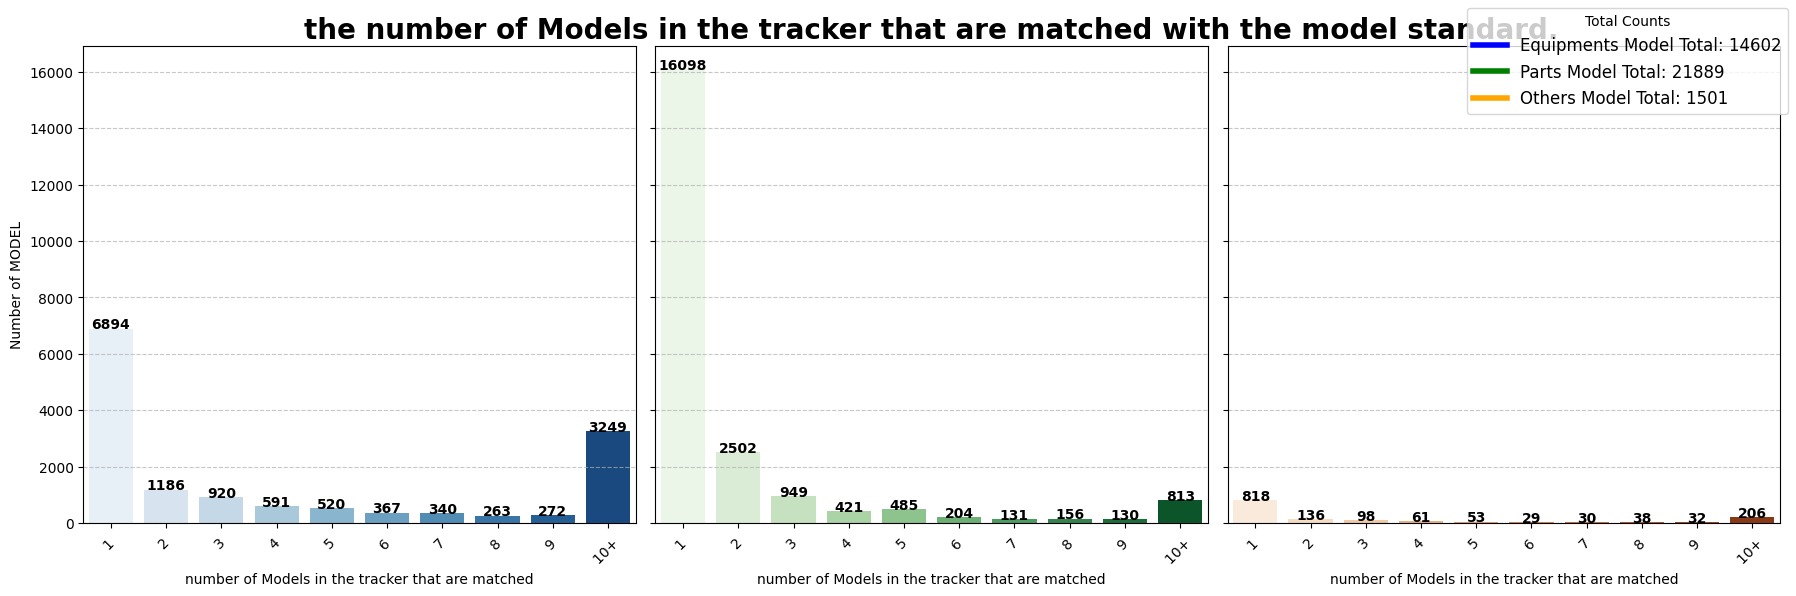

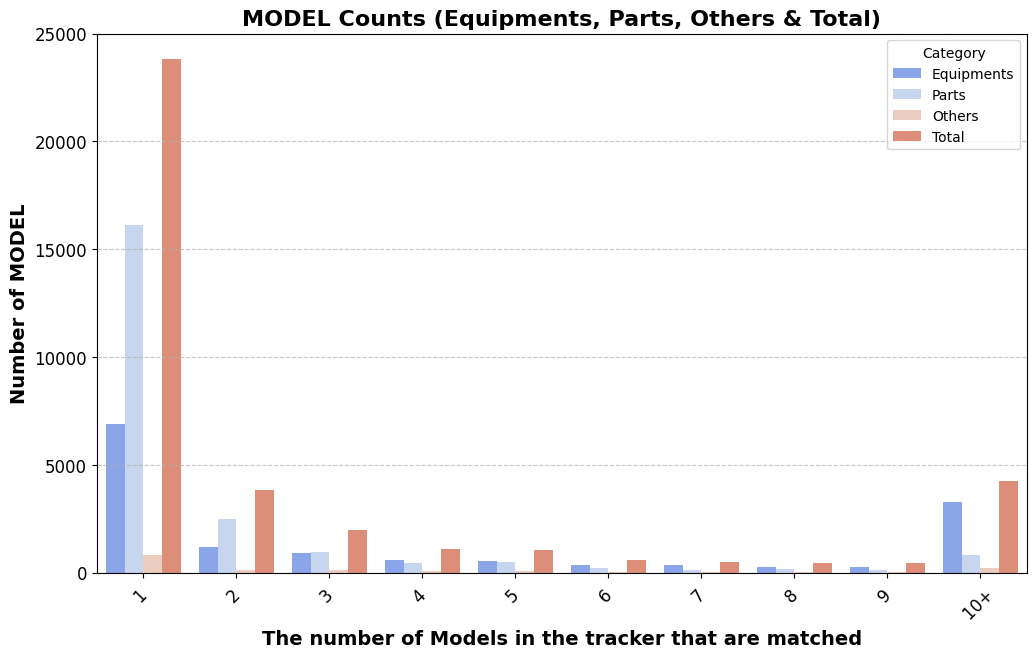

In [230]:
# Prevent negative sign issues
plt.rcParams["axes.unicode_minus"] = False

# Define function to filter and compute bin counts
def get_bin_counts(tracker_info, category_list, category_name):
    filtered_df = tracker_info[tracker_info["Category_Name"].isin(category_list)]
    filtered_df = filtered_df[filtered_df["STD_MODEL_YN"] == "Y"]

    model_counts = filtered_df["MODEL_ID"].value_counts()

    # Define bins (1 to 10 occurrences, and 10+ occurrences)
    max_count = model_counts.max()
    bins = list(range(1, 11))  # 1~10까지 기본 bin
    if max_count > 10:
        bins.append(max_count)  # 10개 이상 구분을 위해 추가

    bin_labels = [f"{i} " for i in range(1, 10)] + ["10+ "]

    # Ensure bins are strictly increasing
    bins = sorted(set(bins))  

    # Assign each count to a bin
    bin_indices = np.digitize(model_counts, bins, right=True) - 1
    bin_indices = np.clip(bin_indices, 0, len(bin_labels) - 1)  # Ensure no negative values

    # Count the number of MODEL_IDs in each bin
    bin_counts = np.bincount(bin_indices, minlength=len(bin_labels))

    return pd.DataFrame({"Category": category_name, "Bin": bin_labels, "Count": bin_counts})

# Compute bin counts for each category
df_equipments = get_bin_counts(tracker_info, EQUIPMENTS_CATEGORY, "Equipments")
df_parts = get_bin_counts(tracker_info, PARTS_CATEGORY, "Parts")
df_others = get_bin_counts(tracker_info, OTHERS_CATEGORY, "Others")

# Compute total count for legend
equipments_total = df_equipments["Count"].sum()
parts_total = df_parts["Count"].sum()
others_total = df_others["Count"].sum()

# 🎨 Individual plots with count labels
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Plot for Equipments
sns.barplot(data=df_equipments, x="Bin", y="Count", hue="Bin", palette="Blues", legend=False, ax=axes[0])
axes[0].set_title("", fontsize=20, fontweight="bold")
for i, row in df_equipments.iterrows():
    axes[0].text(i, row["Count"] + 1, str(row["Count"]), ha="center", fontsize=10, fontweight="bold")

# Plot for Parts
sns.barplot(data=df_parts, x="Bin", y="Count", hue="Bin", palette="Greens", legend=False, ax=axes[1])
axes[1].set_title("the number of Models in the tracker that are matched with the model standard.", fontsize=20, fontweight="bold")
for i, row in df_parts.iterrows():
    axes[1].text(i, row["Count"] + 1, str(row["Count"]), ha="center", fontsize=10, fontweight="bold")

# Plot for Others
sns.barplot(data=df_others, x="Bin", y="Count", hue="Bin", palette="Oranges", legend=False, ax=axes[2])
axes[2].set_title("", fontsize=20, fontweight="bold")
for i, row in df_others.iterrows():
    axes[2].text(i, row["Count"] + 1, str(row["Count"]), ha="center", fontsize=10, fontweight="bold")

for ax in axes:
    ax.set_xticks(range(len(df_equipments["Bin"])))  # Fix ticks first
    ax.set_xticklabels(df_equipments["Bin"], rotation=45)
    ax.set_xlabel("number of Models in the tracker that are matched")
    ax.set_ylabel("Number of MODEL")
    ax.grid(axis="y", linestyle="--", alpha=0.7)

# 🎨 범례 추가 (각 카테고리 총합)
handles = [
    plt.Line2D([0], [0], color="blue", lw=4, label=f"Equipments Model Total: {equipments_total}"),
    plt.Line2D([0], [0], color="green", lw=4, label=f"Parts Model Total: {parts_total}"),
    plt.Line2D([0], [0], color="orange", lw=4, label=f"Others Model Total: {others_total}"),
]
fig.legend(handles=handles, loc="upper right", fontsize=12, title="Total Counts")

plt.tight_layout()
plt.show()

df_total = pd.concat([df_equipments, df_parts, df_others])
df_total_grouped = df_total.groupby("Bin", as_index=False)["Count"].sum()
df_total_grouped["Category"] = "Total"

# Combine all for final visualization
df_final = pd.concat([df_total, df_total_grouped])

# 🎨 Combined plot with hue and count labels
plt.figure(figsize=(12, 7))
ax = sns.barplot(data=df_final, x="Bin", y="Count", hue="Category", palette="coolwarm")

# for i, row in df_final.iterrows():
#     ax.text(i % len(df_final["Bin"].unique()), row["Count"] + 1, str(row["Count"]), ha="center", fontsize=10, fontweight="bold")

plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("The number of Models in the tracker that are matched", fontsize=14, fontweight="bold")
plt.ylabel("Number of MODEL", fontsize=14, fontweight="bold")
plt.title("MODEL Counts (Equipments, Parts, Others & Total)", fontsize=16, fontweight="bold")
plt.legend(title="Category")
plt.grid(axis="y", linestyle="--", alpha=0.7)  # Add horizontal grid lines

plt.show()


In [253]:
precessed_model_df.head()

modelID                modelSTDName   MakerID  \
0  MO737993  rcs2-se7c-i-60-16-250-t2-m  MA275211   
1  MO736784                   p50e-12-n     MA424   
2    MO6669                      ih1000  MA245914   
3  MO739233               spr-903-x0675    MA2729   
4  MO886711                   cuwls-080  MA252842   

                                          modelAlias        category  \
0                         rcs2-se7c-i-60-16-250-t2-m  Motion Control   
1                                          p50e-12-n              RF   
2  ih1000,ih1000 heac,pump,ih1000,itim,w/invrtr,d...            Pump   
3                                      spr-903-x0675           Robot   
4                                          cuwls-080         PKG ETC   

                                          makerAlias  \
0   iai,iai automation,iai co., ltd.,iai corporation   
1                                              cosel   
2  ,에드워드,에드워드코리아,에드워드코리아(주),에드워드코리아㈜,엘지전자㈜,한국알박㈜,...   
3  amat,ase,daihen,daihen corporation,tel,tel/daihen   
4           cuon soiution,cuon solution,cuonsolution   

                                    modelAlias_split  \
0                     rcs 2-se 7 c-i-60-16-250-t 2-m   
1                                        p 50 e-12-n   
2  ih 1000 heac pump itim w/invrtr deseg rear utl...   
3                                     spr-903-x 0675   
4                                          cuwls-080   

                                    makerAlias_split  \
0                iai automation co. ltd. corporation   
1                                              cosel   
2  에드워드 에드워드코리아 에드워드코리아(주) 에드워드코리아㈜ 엘지전자㈜ 한국알박㈜ a...   
3         amat ase daihen corporation tel tel/daihen   
4                cuon soiution solution cuonsolution   

                                          Process_nm  \
0                                                      
1                                                      
2  dif dry pump dry_pump (for a 412, sn:30160) sn...   
3                                                      
4                                                alt   

                                       Configuration  
0                             name: actuator q'ty: 1  
1                  name: switching regulator q'ty: 1  
2  1000 intel process pump refurbished std exch 1...  
3  name: robot remark: 2 mouths (body+control/dri...  
4  1. power : ac 220 v 2. air pressure 0.5 mpa 3....

In [232]:
model_text = []  # modelAlias + category + maker + process_nm + configuration
model_standard= []
id_map = []           # modelID 추적용

for _, row in equipment_model_df.iterrows():
    # 텍스트 벡터용 필드 합치기
    text = f"{row['category']} {row['modelAlias_split']} {row['Process_nm']} {row['makerAlias_split']}".lower().strip()
    # 모델 표준명
    model_standard.append(row["modelSTDName"])
    model_text.append(text)
    id_map.append(row["modelID"])


0.0

In [234]:
i=0
for confing in model_text:
    if 500 < len(confing):
        i+=1
        print(confing,i)

wet m 3306 metal etcher single cleaning 비코코리아 유한회사 稲畑産業(株) bruk bruker dektak/veeco dektek digital instrument instruments/veeco dimension drytek edwards emcore innotec automation instruments litho md ( ) miller design & equipment nanometrics sloan ia technology corporation inc. ssec tel tesco(vecco) ultratech ulvac osaka branch vecco metrology (ulvac) (ulvac?) asia i&a tech pte ltd encore kr process rs spector touson wyko veeco(bruker) veeco(dektak) veeco(emcore) veeco(u.s.a) veeco/dektak veeco/i&a veeco/sloan veeco/ulvac veeko vico vistec semiconductor 1
track act 12 single cot/dev cov/dev sog coater u-bump pr [cow] 東京エレクトロン 東京エレクトロン株式会社 amat ltd material llc research materials corp corp. (mrc) corporation reserch mc electronic mrc nippon co. ltd. quartz-sic sss tbd tegal tel ( tokyo electron ltd.) (tokyo electro ltd)/america japan korea sagami limidted sccm tel(일본) tel(mrc) tel(tokyo limited) tel/ke telmecint tetl tokushima rectron elctron elecron electoron electrom (tel) in inc. eur

- tracker에서 장비 model과 매칭되는 개수 : 14,602 standard model 장비의 개수 : 17,383
- tracker에서 부품 model과 매칭되는 개수 : 21,889 standard model 부품의 개수 : 366,470
- tracker에서 others model과 매칭되는 개수 : 1,501 standard model others의 개수 : 1,744

# Text Search

In [235]:
from milvus_model.hybrid import BGEM3EmbeddingFunction

ef = BGEM3EmbeddingFunction(use_fp16=False, device="cuda")
dense_dim = ef.dim["dense"]

# Generate embeddings using BGE-M3 model
text_vectors = ef(model_text)          


pre tokenize: 100%|██████████| 1087/1087 [00:00<00:00, 1916.48it/s]
You're using a XLMRobertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.
Inference Embeddings: 100%|██████████| 1087/1087 [00:44<00:00, 24.37it/s] 


- return 밀집백터, sparse 2가지 백터를 뱉어냄
- 밀집(Dense) 벡터	모든 차원에 값이 있는 벡터	[0.1, 0.2, 0.3, ..., 0.5]
- 희소(Sparse) 벡터	대부분 0이고, 중요한 값만 저장	{(10, 0.4), (500, 0.8), (2000, 0.3)}

In [236]:

# milvus에 저장
from pymilvus import (
    connections,
    utility,
    FieldSchema,
    CollectionSchema,
    DataType,
    Collection,
)

connections.connect(
    alias="default",
    host="172.17.0.1",
    port="19530"
)


fields = [
    # modelID를 primary key로 사용
    FieldSchema(name="model_id", dtype=DataType.VARCHAR, is_primary=True, max_length=50),

    # 원본 텍스트 저장 (선택사항)
    FieldSchema(name="model_text", dtype=DataType.VARCHAR, max_length=1024),

    # 모델 네임, 모델 메이커 vector
    FieldSchema(name="sparse_vector", dtype=DataType.SPARSE_FLOAT_VECTOR),
    FieldSchema(name="dense_vector", dtype=DataType.FLOAT_VECTOR, dim=dense_dim),
]

schema = CollectionSchema(fields)

col_name = "stardard_model"
if utility.has_collection(col_name):
    Collection(col_name).drop()

    
col = Collection(col_name, schema, consistency_level="Strong")

sparse_index = {"index_type": "SPARSE_INVERTED_INDEX", "metric_type": "IP"}
# sparse 인덱스들 (텍스트 및 프로세스용)
col.create_index("sparse_vector", sparse_index)

dense_index = {"index_type": "AUTOINDEX", "metric_type": "IP"}
# dense 인덱스들 (텍스트 및 프로세스용)
col.create_index("dense_vector", dense_index)
col.load()


- Sparse vector
input (G4)
- MO252 AIX 2800G4 HT MA78 2800 G4HT,2800G4-HT 6x6",2800G4-HT parts,AIX 2800G4 HT,AIX2800 G4 HT,AIX2800 G4HT,AIX2800G4HT,G4 2800HT MoCVD',
- "G4"	✅ 가능	"AIX 2800G4 HT"에서 분리된 경우 검색 가능
- "G4HT"	⚠️ 부분 가능	"G4HT"가 하나의 단어로 인식되면 검색 어려움
- "2800G4HT"	❌ 어려움	"2800G4HT"가 하나의 단어로 처리되면 검색되지 않을 가능성이 큼
- "AIX"	✅ 가능	TF-IDF/BM25에서 높은 중요도를 가질 가능성이 큼
- "2800G4"	⚠️ 부분 가능	"2800G4 HT"처럼 분리된 경우 검색 가능, 안 분리되면 검색 어려움

In [237]:
shortened_model_text = [text[:700] for text in model_text]

In [238]:
for i in range(0, len(model_text), 50):
    batched_entities = [
        id_map[i : i + 50],
        shortened_model_text[i : i + 50],
        text_vectors["sparse"][i : i + 50],
        text_vectors["dense"][i : i + 50],
    ]
    col.insert(batched_entities)
    
    # insert가 완료되고 나면 flush를 하는것이 일반적이다. flush를 하지 않았을경우 메모리에 저장되기때문에 속도는 빠르나 배포할때는 flush를 해야한다.
col.flush()
print("Number of entities inserted:", col.num_entities)


Number of entities inserted: 17392


# search Define

In [239]:
from pymilvus import (
    AnnSearchRequest,
    WeightedRanker,
)


def dense_search(col, query_dense_embedding, anns_field="dense_vector", limit=5, cutoff=0.1):
    search_params = {"metric_type": "IP", "params": {}}
    res = col.search(
        data=[query_dense_embedding],
        anns_field=anns_field,
        limit=limit,
        output_fields=["model_id"],
        param=search_params,
    )[0]
    return [hit.get("model_id") for hit in res if hit.distance >= cutoff]



def sparse_search(col, query_sparse_embedding, anns_field="sparse_vector", limit=5, cutoff=0.1):
    search_params = {"metric_type": "IP", "params": {}}
    res = col.search(
        data=[query_sparse_embedding],
        anns_field=anns_field,
        limit=limit,
        output_fields=["model_id"],
        param=search_params,
    )[0]
    return [hit.get("model_id") for hit in res if hit.distance >= cutoff]


def hybrid_search(
    col,
    query_dense_embedding,
    query_sparse_embedding,
    sparse_weight=1.0,
    dense_weight=1.0,
    limit=5,
    cutoff=0.1,
    original_query_text=None
):
    dense_search_params = {"metric_type": "IP", "params": {}}
    dense_req = AnnSearchRequest(
        [query_dense_embedding], "dense_vector", dense_search_params, limit=limit
    )
    sparse_search_params = {"metric_type": "IP", "params": {}}
    sparse_req = AnnSearchRequest(
        [query_sparse_embedding], "sparse_vector", sparse_search_params, limit=limit
    )
    rerank = WeightedRanker(sparse_weight, dense_weight)
    res = col.hybrid_search(
        [sparse_req, dense_req], rerank=rerank, limit=limit, output_fields=["model_id"]
    )[0]
        # 정확 일치 필터링 우선 적용
    if original_query_text and original_query_text.isdigit():
        filtered_res = [hit for hit in res if hit.get("model_id") == original_query_text]
        if filtered_res:
            return [hit.get("model_id") for hit in filtered_res]
    return [hit.get("model_id") for hit in res if hit.distance >= cutoff]

In [240]:
precessed_model_df[precessed_model_df['category'].isin(EQUIPMENTS_CATEGORY)]

modelID    modelSTDName   MakerID  \
4       MO886711       cuwls-080  MA252842   
8       MO345734   os-ovn11-cl05    MA2817   
9       MO299924  os-ovn11-cl01w    MA2817   
10      MO333933    os-ovn11-c02    MA2817   
11      MO886710       curwa-530  MA252842   
...          ...             ...       ...   
385606    MO6090         dmc200a    MA2737   
385607    MO5986      newview600    MA2608   
385608    MO6690       tct-62lmv     MA622   
385609     MO954         fad2200    MA1487   
385610     MO955         fad2300    MA1487   

                                               modelAlias category  \
4                                               cuwls-080  PKG ETC   
8                                           os-ovn11-cl05  PKG ETC   
9       os ovn11cl01w,os_ovn11cl01w,osovn11cl01w,os-ov...  PKG ETC   
10                                           os-ovn11-c02  PKG ETC   
11                                              curwa-530  PKG ETC   
...                                                   ...      ...   
385606                                            dmc200a  PKG ETC   
385607                                         newview600  PKG ETC   
385608                                          tct-62lmv  PKG ETC   
385609                                            fad2200  PKG ETC   
385610                                            fad2300  PKG ETC   

                                               makerAlias  \
4                cuon soiution,cuon solution,cuonsolution   
8       (주)대한올포랩,오성,오성 lst,오성에스티,오성엘에스티㈜,오성lst,osung,o...   
9       (주)대한올포랩,오성,오성 lst,오성에스티,오성엘에스티㈜,오성lst,osung,o...   
10      (주)대한올포랩,오성,오성 lst,오성에스티,오성엘에스티㈜,오성lst,osung,o...   
11               cuon soiution,cuon solution,cuonsolution   
...                                                   ...   
385606                                          dip meter   
385607  翟柯系統股份有限公司,ametek/cameca,brooks automation / z...   
385608                                    envron division   
385609  武蔵エンジニアリング,ap tech,iwatani int'l corp,muashi e...   
385610  武蔵エンジニアリング,ap tech,iwatani int'l corp,muashi e...   

                                         modelAlias_split  \
4                                               cuwls-080   
8                                         os-ovn 11-cl 05   
9       os ovn 11 cl 01 w os_ovn 11 cl 01 w osovn 11 c...   
10                                         os-ovn 11-c 02   
11                                              curwa-530   
...                                                   ...   
385606                                          dmc 200 a   
385607                                        newview 600   
385608                                         tct-62 lmv   
385609                                           fad 2200   
385610                                           fad 2300   

                                         makerAlias_split  \
4                     cuon soiution solution cuonsolution   
8       (주)대한올포랩 오성 lst 오성에스티 오성엘에스티㈜ 오성lst osung osun...   
9       (주)대한올포랩 오성 lst 오성에스티 오성엘에스티㈜ 오성lst osung osun...   
10      (주)대한올포랩 오성 lst 오성에스티 오성엘에스티㈜ 오성lst osung osun...   
11                    cuon soiution solution cuonsolution   
...                                                   ...   
385606                                          dip meter   
385607  翟柯系統股份有限公司 ametek/cameca brooks automation/zyg...   
385608                                    envron division   
385609  武蔵エンジニアリング ap tech iwatani int'l corp muashi e...   
385610  武蔵エンジニアリング ap tech iwatani int'l corp muashi e...   

                               Process_nm  \
4                                     alt   
8       cof cof, oven n 2 oven#05 oven#06   
9                                    oven   
10                           wafer baking   
11                                    cof   
...                                   ...   
385606                          peel test   
385607                     3 d inspection   
385608     

In [241]:
query_name = "sne4500m Metrology HV"

In [248]:
col.query(
    expr="model_id == 'MO273863'",       # 필수
    output_fields=["model_text"],  # 조회하고 싶은 컬럼명 리스트
    limit=5    # (일부 버전에서 지원)
)

data: ["{'model_text': 'metrology alta 4500  0190-00398 0190-01292 r akt ama amaat amap amat japan amat/asm amat/cmj amat[applied materials inc] amat 0 amc ame amj amjmore amk amt amt-japan appled materals appledmateri applied materia material inc ( amp ) (1000008613) */orbot ® a/p ltd. in inc. co. oem* south east a asia p pte ltd (1000016712) ™ materials(tm) materilas matrials meterials precison appliedmateri appliedmaterials southeastasiapte.lt appliedmaterialsjapan appliedmaterialskorea appliedmaterialssoutheastasiapte.lt asml axcelis comet dsv ferrotec dalian (1000122558) gasonics genus ing-buro intel module repair - oc 7 (1000050471) kal kawasaki robotics kla koem tech lam matrix mico ceramics mks neslab novel', 'model_id': 'MO273863'}"]

In [243]:
query_embeddings = ef([normalize_query(query_name)])
sparse_results = dense_search(col, query_embeddings["dense"][0],anns_field="dense_vector",cutoff=0,limit=20)
sparse_results

['MO104292',
 'MO272919',
 'MO298384',
 'MO246058',
 'MO272807',
 'MO288365',
 'MO95767',
 'MO300819',
 'MO8142',
 'MO272477',
 'MO381879',
 'MO2136',
 'MO253806',
 'MO337587',
 'MO184546',
 'MO241652',
 'MO338655',
 'MO345719',
 'MO261839',
 'MO762436']

In [244]:
query_embeddings = ef([normalize_query(query_name)])
sparse_results = sparse_search(col, query_embeddings["sparse"][[0]],anns_field="sparse_vector",cutoff=0,limit=20)
sparse_results

['MO298384',
 'MO2136',
 'MO273863',
 'MO2267',
 'MO346056',
 'MO46629',
 'MO857',
 'MO8618',
 'MO8715',
 'MO4947',
 'MO8592',
 'MO154484',
 'MO339934',
 'MO250093',
 'MO169501',
 'MO1502',
 'MO59026',
 'MO239113',
 'MO4949',
 'MO770256']

In [83]:
model_df[model_df["modelID"]=="MO288355"]

modelID modelSTDName MakerID modelAlias category makerSTDName
380028  MO288355         5565   MA963       5565  ATE ETC          NaN

In [71]:
searchname="MO169534"
precessed_model_df[precessed_model_df["modelID"]==searchname]

modelID   modelSTDName MakerID  \
19534  MO169534  nanospec 6100  MA1505   

                                              modelAlias   category  \
19534  6100,6100 nanospec,9-7200-0195e (nano6100),m61...  Metrology   

                                              makerAlias  \
19534  ,나노메트릭스,나노메트릭스코리아(주),액센트 코리아,액센트 코리아 (accent k...   

                                        modelAlias_split  \
19534  6100 nanospec 9 7200 0195 e nano 6100 m 6100 n...   

                                        makerAlias_split  \
19534  나노메트릭스 나노메트릭스코리아 주 액센트 코리아 accent korea accent...   

                                              Process_nm  \
19534  clean bench film thick thickness measurem meas...   

                                           Configuration  
19534  1 x 6 8 m 6100 9 7200 0195 e nano 6100 capable...

In [74]:
query_name.lower()

'8595e'

In [30]:
query_embeddings["sparse"][[0]]

<Compressed Sparse Row sparse array of dtype 'float64'
	with 1 stored elements and shape (1, 250002)>

In [ ]:
query_embeddings = ef([normalize_query(query_name)])
hybrid_results = hybrid_search(
    col,
    query_embeddings["dense"][0],
    query_embeddings["sparse"][[0]],
    sparse_weight=0.7,
    dense_weight=0.3,
    original_query_text=normalize_query(query_name)
)
hybrid_results

['MO169534',
 'MO36428',
 'MO155934',
 'MO261119',
 'MO5961',
 'MO5960',
 'MO10717',
 'MO259517',
 'MO2730',
 'MO272704']

# 시험테스트

In [37]:
# Enter your search query
query = input("Enter your search query: ")
print(query)

# Generate embeddings for the query
query_embeddings = ef([query])
# print(query_embeddings)

MO667639 MBBB10-401133-11 TEL


In [38]:
dense_results = dense_search(col, query_embeddings["dense"][0])
sparse_results = sparse_search(col, query_embeddings["sparse"][[0]])
hybrid_results = hybrid_search(
    col,
    query_embeddings["dense"][0],
    query_embeddings["sparse"][[0]],
    sparse_weight=0.7,
    dense_weight=1.0,
)

In [69]:
unknown_df = tracker_info[
    (tracker_info["STD_MODEL_YN"] == "Y") & (tracker_info["Category_Name"] == "Fab Others")
]
unknown_df.iloc[10:]

Category_Code Category_Name  MAKER_ID  MAKER_NAME  MODEL_ID  \
7406       COMPONENT    Fab Others    MA1561       Nikon    MO8808   
7412       COMPONENT    Fab Others   MA18089       Asyst    MO1369   
8005       COMPONENT    Fab Others    MA2088        SSEC  MO178099   
8147       COMPONENT    Fab Others     MA729    Fortrend  MO373685   
9541       COMPONENT    Fab Others     MA667    EV GROUP     MO932   
...              ...           ...       ...         ...       ...   
669301     COMPONENT    Fab Others    MA1446         MKS  MO241300   
669402     COMPONENT    Fab Others    MA1446         MKS  MO241300   
672820     COMPONENT    Fab Others    MA2729      DAIHEN   MO37129   
674285     COMPONENT    Fab Others  MA272815  WTC binder  MO343855   
674307     COMPONENT    Fab Others    MA1919      Sankyo  MO117726   

        MODEL_NAME              Process_NM  \
7406       Unknown       Remote controller   
7412       LPT2200                       －   
8005          3302       high water washer   
8147    LAMINA 203                     NaN   
9541        EVG640            Mask Aligner   
...            ...                     ...   
669301        Part  MKS parts for the ASP+   
669402        Part    [Part]MKS parts 2set   
672820      CMC-10                     NaN   
674285       78532                    Etch   
674307       SWH80                     NaN   

                                            Configuration SERIAL_NO VINTAGE  \
7406    Module : Photo Tool Deconed(O)Tool Deinstalled...       NaN     NaN   
7412                                                    －         ー     NaN   
8005    Handle idle (production machine) Support 12 in...       NaN     NaN   
8147                                                  NaN       NaN     NaN   
9541                                                  NaN       NaN     NaN   
...                                                   ...       ...     ...   
669301                                                NaN       NaN     NaN   
669402                    Auto Match, Magnetron,도파관,Etc.,      EB85    1999   
672820  Qty : 3 / Title : DAIHEN CMC-10 AUTO TUNE CONT...       NaN     NaN   
674285                                                NaN    990063    2000   
674307                                                NaN       NaN     NaN   

        ...                                         Seller  \
7406    ...                             GES Associates LLC   
7412    ...  Sumitomo Mitsui Finance and Leasing Co., Ltd.   
8005    ...            Siliconware Precision Ind. Co. Ltd.   
8147    ...                              Intel Corporation   
9541    ...                 Macquarie Electronics USA Inc.   
...     ...                                            ...   
669301  ...                                         Pascal   
669402  ...                            SurplusGLOBAL, Inc.   
672820  ...                  Capitol Area Technology, LLC.   
674285  ...                      GLOBALFOUNDRIES U.S. Inc.   
674307  ...                            E-Tech Solution Inc   

                                                    Owner USER_FAB_ID  \
7406    Texas Instruments Semiconductor Manufacturing ...         NaN   
7412           Sony Semiconductor Manufacturing Co., Ltd.         NaN   
8005                  Siliconware Precision Ind. Co. Ltd.         NaN   
8147                                    Intel Corporation         NaN   
9541                                           Qorvo, Inc         NaN   
...                                                   ...         ...   
669301                                SurplusGLOBAL, Inc.         NaN   
669402                                SurplusGLOBAL, Inc.         NaN   
672820                      Capitol Area Technology, LLC.         NaN   
674285                          GLOBALFOUNDRIES U.S. Inc.         NaN   
674307                                E-Tech Solution Inc         NaN   

       COUNTRY_CD P&C      CODE STD_MODEL_

In [160]:
equipments_tracker_df=tracker_info[tracker_info['Category_Name'].isin(EQUIPMENTS_CATEGORY)]
equipments_tracker_df

Category_Code     Category_Name MAKER_ID MAKER_NAME MODEL_ID  \
1       REFLOW_SOLDERING  Reflow&Soldering    MA752   Furukawa   MO6845   
3           CHIP_MOUNTER      Chip Mounter    MA740       Fuji    MO588   
4             DICING_SAW        Dicing Saw    MA522      Disco    MO719   
105          WIRE_BONDER       Wire Bonder    MA179        ASM    MO430   
206          WIRE_BONDER       Wire Bonder    MA179        ASM    MO430   
...                  ...               ...      ...        ...      ...   
674632               PVD               PVD    MA110       AMAT    MO869   
674633               PVD               PVD    MA110       AMAT    MO869   
674634               PVD               PVD    MA110       AMAT    MO869   
674635               PVD               PVD    MA110       AMAT    MO869   
674643      BACK_GRINDER      Back Grinder     MA13  Accretech   MO1930   

          MODEL_NAME    Process_NM  \
1       XNIII-725PCG  Reflow oven_   
3            CP-842E  Chip mounter   
4             DFD640     Wafer Saw   
105          Eagle60   Wire Bonder   
206          Eagle60   Wire Bonder   
...              ...           ...   
674632      Endura 2         METAL   
674633      Endura 2           NaN   
674634      Endura 2           NaN   
674635      Endura 2           NaN   
674643         PG200  Back Grinder   

                                            Configuration SERIAL_NO VINTAGE  \
1                                                     NaN    X04597    2000   
3                                                     NaN       538    2004   
4                                  Including CSP Function    EL1403    1996   
105                                                   NaN  E649-028    2008   
206                                                   NaN  E626-031    2005   
...                                                   ...       ...     ...   
674632  OEM: AMAT  Tool Model: Endura2  Software Versi...       NaN    2004   
674633  OEM: AMAT  Tool Model: Endura2  Software Versi...       NaN     NaN   
674634                                                NaN       NaN     NaN   
674635                                                NaN       NaN     NaN   
674643             Vacuum Pump, Chiller, Air Dryer, PG200  P03001BY    2004   

       Tracker_availability                                 Seller  \
1                     AVAIL                    JINUTEC CORPORATION   
3                 NOT_AVAIL                                    DHC   
4                 NOT_AVAIL                               SEMI RUN   
105               NOT_AVAIL                     ENERCORE CO., LTD.   
206               NOT_AVAIL                     ENERCORE CO., LTD.   
...                     ...                                    ...   
674632               UNSPEC  Macquarie Asset Finance Japan Limited   
674633               UNSPEC  Macquarie Asset Finance Japan Limited   
674634                AVAIL  Macquarie Asset Finance Japan Limited   
674635               UNSPEC  Macquarie Asset Finance Japan Limited   
674643                AVAIL                    SurplusGLOBAL, Inc.   

                                 Owner COUNTRY_CD P&C STD_MODEL_YN  \
1                  JINUTEC CORPORATION        NaN   N            Y   
3                                  DHC        NaN   N            Y   
4                             SEMI RUN         KR   N            Y   
105                 ENERCORE CO., LTD.         KR   N            Y   
206                 ENERCORE CO., LTD.         KR   N            Y   
...                                ...        ...  ..          ...   
674632  Micron Memory Taiwan Co., Ltd.         TW   N            Y   
674633  Micron Memory Taiwan Co., Ltd.         TW   N            Y   
674634  Micron Memory Taiwan Co., Ltd.         TW   N            Y   
674635  Micron Technology Taiwan, Inc.         TW   N            Y   
674643                            INTS         KR   N            Y   

       STD_MAKER_YN Pr

In [175]:
from tqdm import tqdm
i = 0


for eq_name, eq_id in tqdm(equipments_tracker_df[equipments_tracker_df["STD_MODEL_YN"] == "Y"][["MODEL_NAME", "MODEL_ID"]].values[:1000]):
    try:
        #eq_name이 int인 경우 감지 & 오류 출력
        # if isinstance(eq_name, int):
        #     raise ValueError(f"⚠ 오류: MODEL_NAME({eq_name})이 int 타입입니다!")

        eq_name = str(eq_name).lower()  # 문자열로 변환

        # 검색 수행
        query_embeddings = ef([eq_name])
        sparse_results = dense_search(col, query_embeddings["dense"][0],anns_field="dense_text_vector",cutoff=0.6,limit=5)
        print(sparse_results)

        # 결과 분석
        keyword = sparse_results[0].split(" ")[0] if sparse_results else None
        #print(keyword)
        if keyword == eq_id:
            i += 1
        else:
            print(f"🚨 트래커 모델이름: {eq_name}, 트래커 모델아이디: {eq_id}, search가 찾은 값: {keyword}")

    except ValueError as e:
        print(f"❌ {e}")  # `eq_name`이 int였을 때 오류 메시지 출력
    except Exception:
        print(f"❌ standard model 못찾음: {eq_name}, {eq_id}")
    
        

print(f"✅ 일치하는 모델 수: {i}")


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:10<?, ?it/s]


KeyboardInterrupt: 

In [167]:
precessed_model_df[precessed_model_df["modelID"]=="MO283523"]

modelID modelSTDName  modelAlias     category CLEAN_MAKER_NM  \
379849  MO283523   ihawk aero  ihawk aero  Wire Bonder            asm   

         Process_Config_combine  
379849  Wire Bonding wire bond

In [34]:
tracker_info

Category_Code      Category_Name  MAKER_ID  \
0          GENERAL_TESTER     General Tester      MA45   
1        REFLOW_SOLDERING   Reflow&Soldering     MA752   
2       PRINTER_DISPENSER  Printer&Dispenser     MA881   
3            CHIP_MOUNTER       Chip Mounter     MA740   
4              DICING_SAW         Dicing Saw     MA522   
...                   ...                ...       ...   
674739           PARTS_PC        Part Others     MA110   
674740           PARTS_PC        Part Others  MA262092   
674741           PARTS_PC        Part Others     MA110   
674742           PARTS_PC        Part Others  MA283519   
674743           PARTS_PC        Part Others  MA283519   

                             MAKER_NAME  MODEL_ID        MODEL_NAME  \
0                             Advantest    MO6491             8595E   
1                              Furukawa    MO6845      XNIII-725PCG   
2                               Hitachi    MO2604          TPM-1100   
3                                  Fuji     MO588           CP-842E   
4                                 Disco     MO719            DFD640   
...                                 ...       ...               ...   
674739                             AMAT  MO400396        0150-20124   
674740                              TEL  MO659810  ES3D05-200162-12   
674741                             AMAT  MO400983        0200-35051   
674742  PARKER HANNIFIN CORP-COMPUMOTOR  MO797121        SVC2195M-7   
674743  PARKER HANNIFIN CORP-COMPUMOTOR  MO797120       SVC2195M6-7   

               Process_NM                                      Configuration  \
0       Spectrum Analyzer                                                NaN   
1            Reflow oven_                                                NaN   
2          Screen Printer                                                NaN   
3            Chip mounter                                                NaN   
4               Wafer Saw                             Including CSP Function   
...                   ...                                                ...   
674739                NaN  Qty : 2 / Title : Applied Materials (AMAT) 015...   
674740                NaN  Qty : 5 / Title : TEL ES3D05-200162-12 Ring, Q...   
674741                NaN  Qty : 3 / Title : Applied Materials (AMAT) 020...   
674742                NaN  Qty : 6 / Title : PARKER SVC2195M-7 VALVE SING...   
674743                NaN  Qty : 2 / Title : PARKER SVC2195M6-7 VALVE SIN...   

           SERIAL_NO VINTAGE  ...  \
0         4115A05086    2001  ...   
1             X04597    2000  ...   
2       667609AF6838    1996  ...   
3                538    2004  ...   
4             EL1403    1996  ...   
...              ...     ...  ...   
674739           NaN     NaN  ...   
674740           NaN     NaN  ...   
674741           NaN     NaN  ...   
674742           NaN     NaN  ...   
674743           NaN     NaN  ...   

                                                  Seller  \
0                                         Index Solution   
1                                    JINUTEC CORPORATION   
2        Kunshan Wospring Electronics Technology Co.,Ltd   
3                                                    DHC   
4                                               SEMI RUN   
...                                                  ...   
674739                     Capitol Area Technology, LLC.   
674740                     Capitol Area Technology, LLC.   
674741                     Capitol Area Technology, LLC.   
674742                     Capitol Area Technology, LLC.   
674743                     Capitol Area Technology, LLC.   

                                                   Owner USER_FAB_ID  \
0                                      DOULTECH Co., Ltd         NaN   
1                                    JINUTEC CORPORATION         NaN   
2        Kunshan Wospring Electronics Technology Co.,Ltd         NaN   
3                                              

In [35]:
query="SWH80"
query_embeddings = ef([query])
sparse_results = sparse_search(col, query_embeddings["sparse"][[0]])
keyword=sparse_results[0].split(" ")[0]
tracker_info[tracker_info["MODEL_ID"]==keyword]

Category_Code Category_Name MAKER_ID MAKER_NAME  MODEL_ID MODEL_NAME  \
137347     COMPONENT    Fab Others   MA1919     Sankyo  MO117726      SWH80   
137348     COMPONENT    Fab Others   MA1919     Sankyo  MO117726      SWH80   
239318     COMPONENT    Fab Others   MA1919     Sankyo  MO117726      SWH80   
239462     COMPONENT    Fab Others   MA1919     Sankyo  MO117726      SWH80   
239465     COMPONENT    Fab Others   MA1919     Sankyo  MO117726      SWH80   
239479     COMPONENT    Fab Others   MA1919     Sankyo  MO117726      SWH80   
239647     COMPONENT    Fab Others   MA1919     Sankyo  MO117726      SWH80   
241868     COMPONENT    Fab Others   MA1919     Sankyo  MO117726      SWH80   
402005     COMPONENT    Fab Others   MA1919     Sankyo  MO117726      SWH80   
674307     COMPONENT    Fab Others   MA1919     Sankyo  MO117726      SWH80   

                                            Process_NM  \
137347                                             NaN   
137348                                             NaN   
239318  SANKYO AUTO WET STATION FOR PHOTO RESIST STRIP   
239462                     NITRIDE STRIP AUTO WETBENCH   
239465                         SANKYO AUTO WET STATION   
239479                                     OXIDE_STRIP   
239647                            SANKYO NITRIDE STRIP   
241868                                  SALICIDE_STRIP   
402005                                  Salicide Strip   
674307                                             NaN   

                          Configuration    SERIAL_NO VINTAGE  ...  \
137347                              NaN          NaN     NaN  ...   
137348                              NaN          NaN     NaN  ...   
239318                              NaN   D208669501    1996  ...   
239462               Missing Parts Tool   D215199601    1997  ...   
239465                              NaN  DC215239602    1996  ...   
239479  WET Oxide Etch Bench, Automated   D215279601    1996  ...   
239647                              NaN   ADCT210501    1996  ...   
241868                              NaN   C277629501    1995  ...   
402005        Wet Bench, Salicide Strip          NaN    1996  ...   
674307                              NaN          NaN     NaN  ...   

                                   Seller                              Owner  \
137347  GLOBALFOUNDRIES SINGAPORE PTE LTD  GLOBALFOUNDRIES SINGAPORE PTE LTD   
137348  GLOBALFOUNDRIES SINGAPORE PTE LTD  GLOBALFOUNDRIES SINGAPORE PTE LTD   
239318  GLOBALFOUNDRIES SINGAPORE PTE LTD  GLOBALFOUNDRIES SINGAPORE PTE LTD   
239462  GLOBALFOUNDRIES SINGAPORE PTE LTD  GLOBALFOUNDRIES SINGAPORE PTE LTD   
239465  GLOBALFOUNDRIES SINGAPORE PTE LTD  GLOBALFOUNDRIES SINGAPORE PTE LTD   
239479  GLOBALFOUNDRIES SINGAPORE PTE LTD  GLOBALFOUNDRIES SINGAPORE PTE LTD   
239647  GLOBALFOUNDRIES SINGAPORE PTE LTD  GLOBALFOUNDRIES SINGAPORE PTE LTD   
241868  GLOBALFOUNDRIES SINGAPORE PTE LTD  GLOBALFOUNDRIES SINGAPORE PTE LTD   
402005  GLOBALFOUNDRIES SINGAPORE PTE LTD  GLOBALFOUNDRIES SINGAPORE PTE LTD   
674307                E-Tech Solution Inc                E-Tech Solution Inc   

       USER_FAB_ID COUNTRY_CD P&C      CODE STD_MODEL_YN STD_MAKER_YN  \
137347         NaN         SG   N  RCAS-A01            Y            Y   
137348         NaN         SG   N  RCAS-A02            Y            Y   
239318         NaN         SG   N  CRSAT-02            Y            Y   
239462         NaN         SG   N  NITAT-02            Y            Y   
239465         NaN         SG   N  RCAAT-05            Y            Y   
239479         NaN         SG   N  OXTAT-02            Y            Y   
239647         NaN         SG   N  NITW-A01            Y            Y   
241868         NaN         SG   N  SALAT-01            Y            Y   
402005         NaN         SG   N  SALAT-01            Y            Y   
674307         NaN         SG   N       NaN            Y            Y   

       Process(model Info) config(model Info)  
13734

In [36]:
sparse_results

['MO117726 SWH80 MA1919 SANKYO  SWH80,SWH80 Fab Others',
 'MO284567 NS-8080H MA1961 NS-8080H Handler',
 'MO2152 S-7280H MA881 7280H,s7280,S-7280,S7280H,S-7280H,S-7280-H,S7280-H,SEM7280-1,SEM7280-2 Metrology',
 'MO2840 VIISta 80 MA2456 80,Varian VIISta 80,Varian Vista80,VICSta 80,VIISta 80,Viista 80 Classic,VIIsta 80 HP PLUS,VIISTA80,VIIsta80 classi,VIISTA80 Sb,Viista80HC,VIISTA80-HIGH,Viista80HP+,VIIsta80HPPLUS,VIISTAA80,Vista 80,Vista80,Vista80HP+,VllSta 80 Implant',
 'MO275720 80H3149 MA1305 80H3149,80H3149???????????? Fab Others']

In [37]:
def doc_text_formatting(ef, query, docs):
    tokenizer = ef.model.tokenizer
    query_tokens_ids = tokenizer.encode(query, return_offsets_mapping=True)
    query_tokens = tokenizer.convert_ids_to_tokens(query_tokens_ids)
    formatted_texts = []

    for doc in docs:
        ldx = 0
        landmarks = []
        encoding = tokenizer.encode_plus(doc, return_offsets_mapping=True)
        tokens = tokenizer.convert_ids_to_tokens(encoding["input_ids"])[1:-1]
        offsets = encoding["offset_mapping"][1:-1]
        for token, (start, end) in zip(tokens, offsets):
            if token in query_tokens:
                if len(landmarks) != 0 and start == landmarks[-1]:
                    landmarks[-1] = end
                else:
                    landmarks.append(start)
                    landmarks.append(end)
        close = False
        formatted_text = ""
        for i, c in enumerate(doc):
            if ldx == len(landmarks):
                pass
            elif i == landmarks[ldx]:
                if close:
                    formatted_text += "</span>"
                else:
                    formatted_text += "<span style='color:red'>"
                close = not close
                ldx = ldx + 1
            formatted_text += c
        if close is True:
            formatted_text += "</span>"
        formatted_texts.append(formatted_text)
    return formatted_texts

In [38]:
from IPython.display import Markdown, display

# Dense search results
display(Markdown("**Dense Search Results:**"))
formatted_results = doc_text_formatting(ef, query, dense_results)
for result in dense_results:
    display(Markdown(result))

# Sparse search results
display(Markdown("\n**Sparse Search Results:**"))
formatted_results = doc_text_formatting(ef, query, sparse_results)
for result in formatted_results:
    display(Markdown(result))

# Hybrid search results
display(Markdown("\n**Hybrid Search Results:**"))
formatted_results = doc_text_formatting(ef, query, hybrid_results)
for result in formatted_results:
    display(Markdown(result))

**Dense Search Results:**

MO241544 AIX200 MA78 AIX200 MoCVD

MO239 AIM AX MA740 AIM AX,AIMAX Chip Mounter

MO291388 AIX2400 MA78 2400,AIX2400,Aixtron 2400 MoCVD

MO42603 AIX2600 MA78 AIX2600 MoCVD

MO291377 AIX2400 G2 MA78 2400/G2,AIX2400 G2,G2 MoCVD


**Sparse Search Results:**

MO117726<span style='color:red'> SWH80</span> MA1919 SANKYO <span style='color:red'> SWH80</span>,SW<span style='color:red'>H80</span> Fab Others

MO284567 NS-80<span style='color:red'>80H</span> MA1961 NS-80<span style='color:red'>80H</span> Handler

MO2152 S-7280<span style='color:red'>H</span> MA881 7280<span style='color:red'>H</span>,s72<span style='color:red'>80</span>,S-7280,S72<span style='color:red'>80H</span>,S-7280<span style='color:red'>H</span>,S-7280-<span style='color:red'>H</span>,S72<span style='color:red'>80</span>-<span style='color:red'>H</span>,SEM7280-1,SEM72<span style='color:red'>80</span>-2 Metrology

MO2840 VIISta 80 MA2456 80,Varian VIISta 80,Varian Vista<span style='color:red'>80</span>,VICSta 80,VIISta 80,Viista 80 Classic,VIIsta 80 HP PLUS,VIISTA<span style='color:red'>80</span>,VIIsta<span style='color:red'>80</span> classi,VIISTA<span style='color:red'>80</span> Sb,Viista<span style='color:red'>80</span>HC,VIISTA<span style='color:red'>80</span>-<span style='color:red'>H</span>IGH,Viista<span style='color:red'>80</span>HP+,VIIsta<span style='color:red'>80H</span>PPLUS,VIISTAA<span style='color:red'>80</span>,Vista 80,Vista<span style='color:red'>80</span>,Vista<span style='color:red'>80</span>HP+,VllSta 80 Implant

MO275720 80<span style='color:red'>H</span>3149 MA1305 80<span style='color:red'>H</span>3149,<span style='color:red'>80H</span>3149???????????? Fab Others


**Hybrid Search Results:**

MO241544 AIX200 MA78 AIX200 MoCVD

MO239 AIM AX MA740 AIM AX,AIMAX Chip Mounter

MO291388 AIX2400 MA78 2400,AIX2400,Aixtron 2400 MoCVD

MO42603 AIX2600 MA78 AIX2600 MoCVD

MO291377 AIX2400 G2 MA78 2400/G2,AIX2400 G2,G2 MoCVD

### 알아봐야 할 내용
- 스탠다드 모델 중에서 modelSTDNAME, ModelAlias가 unknown 되어 있는데  어떤기준에 의해서 category로 판단된것인지?
- unknown이 상당수 존재하는데 지워도 되는것인지?
- 입력당시에 스탠다드 모델에서 검색되지 않았을 경우 model을 새로 add 하는것으로 알고 있는데 결국 겹치는 모델들도 상당히 존재


In [53]:
tracker_info

Category_Code      Category_Name  MAKER_ID  \
0          GENERAL_TESTER     General Tester      MA45   
1        REFLOW_SOLDERING   Reflow&Soldering     MA752   
2       PRINTER_DISPENSER  Printer&Dispenser     MA881   
3            CHIP_MOUNTER       Chip Mounter     MA740   
4              DICING_SAW         Dicing Saw     MA522   
...                   ...                ...       ...   
674739           PARTS_PC        Part Others     MA110   
674740           PARTS_PC        Part Others  MA262092   
674741           PARTS_PC        Part Others     MA110   
674742           PARTS_PC        Part Others  MA283519   
674743           PARTS_PC        Part Others  MA283519   

                             MAKER_NAME  MODEL_ID        MODEL_NAME  \
0                             Advantest    MO6491             8595E   
1                              Furukawa    MO6845      XNIII-725PCG   
2                               Hitachi    MO2604          TPM-1100   
3                                  Fuji     MO588           CP-842E   
4                                 Disco     MO719            DFD640   
...                                 ...       ...               ...   
674739                             AMAT  MO400396        0150-20124   
674740                              TEL  MO659810  ES3D05-200162-12   
674741                             AMAT  MO400983        0200-35051   
674742  PARKER HANNIFIN CORP-COMPUMOTOR  MO797121        SVC2195M-7   
674743  PARKER HANNIFIN CORP-COMPUMOTOR  MO797120       SVC2195M6-7   

               Process_NM                                      Configuration  \
0       Spectrum Analyzer                                                NaN   
1            Reflow oven_                                                NaN   
2          Screen Printer                                                NaN   
3            Chip mounter                                                NaN   
4               Wafer Saw                             Including CSP Function   
...                   ...                                                ...   
674739                NaN  Qty : 2 / Title : Applied Materials (AMAT) 015...   
674740                NaN  Qty : 5 / Title : TEL ES3D05-200162-12 Ring, Q...   
674741                NaN  Qty : 3 / Title : Applied Materials (AMAT) 020...   
674742                NaN  Qty : 6 / Title : PARKER SVC2195M-7 VALVE SING...   
674743                NaN  Qty : 2 / Title : PARKER SVC2195M6-7 VALVE SIN...   

           SERIAL_NO VINTAGE  ...  \
0         4115A05086    2001  ...   
1             X04597    2000  ...   
2       667609AF6838    1996  ...   
3                538    2004  ...   
4             EL1403    1996  ...   
...              ...     ...  ...   
674739           NaN     NaN  ...   
674740           NaN     NaN  ...   
674741           NaN     NaN  ...   
674742           NaN     NaN  ...   
674743           NaN     NaN  ...   

                                                  Seller  \
0                                         Index Solution   
1                                    JINUTEC CORPORATION   
2        Kunshan Wospring Electronics Technology Co.,Ltd   
3                                                    DHC   
4                                               SEMI RUN   
...                                                  ...   
674739                     Capitol Area Technology, LLC.   
674740                     Capitol Area Technology, LLC.   
674741                     Capitol Area Technology, LLC.   
674742                     Capitol Area Technology, LLC.   
674743                     Capitol Area Technology, LLC.   

                                                   Owner USER_FAB_ID  \
0                                      DOULTECH Co., Ltd         NaN   
1                                    JINUTEC CORPORATION         NaN   
2        Kunshan Wospring Electronics Technology Co.,Ltd         NaN   
3                                              

In [54]:
dense_results = dense_search(col, query_embeddings["dense"][0])
sparse_results = sparse_search(col, query_embeddings["sparse"][[0]])
hybrid_results = hybrid_search(
    col,
    query_embeddings["dense"][0],
    query_embeddings["sparse"][[0]],
    sparse_weight=0.7,
    dense_weight=1.0,
)
dense_results[0].split(" ")[0],  sparse_results[0].split(" ")[0], hybrid_results[0].split(" ")[0]

('MO117726', 'MO117726', 'MO117726')

In [55]:
result_df = tracker_info[tracker_info["MODEL_ID"] == "MO117726"]

# 모든 컬럼에 대해 중복을 제거한 후 문자열로 변환
column_data = {
    col: ", ".join(map(str, set(result_df[col].dropna().to_list()))) for col in result_df.columns
}

column_data  # 딕셔너리 형태로 모든 컬럼의 정보를 반환


{'Category_Code': 'COMPONENT',
 'Category_Name': 'Fab Others',
 'MAKER_ID': 'MA1919',
 'MAKER_NAME': 'Sankyo',
 'MODEL_ID': 'MO117726',
 'MODEL_NAME': 'SWH80',
 'Process_NM': 'OXIDE_STRIP, Salicide Strip, SANKYO AUTO WET STATION FOR PHOTO RESIST STRIP, SALICIDE_STRIP, SANKYO AUTO WET STATION, NITRIDE STRIP AUTO WETBENCH, SANKYO NITRIDE STRIP',
 'Configuration': 'Wet Bench, Salicide Strip, WET Oxide Etch Bench, Automated, Missing Parts Tool',
 'SERIAL_NO': 'D208669501, ADCT210501, DC215239602, C277629501, D215199601, D215279601',
 'VINTAGE': '1995, 1996, 1997',
 'Tracker_availability': 'AVAIL, NOT_AVAIL',
 'Seller': 'GLOBALFOUNDRIES SINGAPORE PTE LTD, E-Tech Solution Inc',
 'Owner': 'GLOBALFOUNDRIES SINGAPORE PTE LTD, E-Tech Solution Inc',
 'USER_FAB_ID': '',
 'COUNTRY_CD': 'SG',
 'P&C': 'N',
 'CODE': 'NITW-A01, SALAT-01, OXTAT-02, NITAT-02, RCAS-A02, CRSAT-02, RCAS-A01, RCAAT-05',
 'STD_MODEL_YN': 'Y',
 'STD_MAKER_YN': 'Y',
 'Process(model Info)': '',
 'config(model Info)': ''}

# UI

In [72]:
import gradio as gr
import pandas as pd

def search(query):
    """
    사용자의 검색어(query)를 입력받아 Dense, Sparse, Hybrid 검색 결과를 반환하는 함수.
    """
    # Generate embeddings for the query
    query_embeddings = ef([query])

    # Perform searches
    dense_results = dense_search(col, query_embeddings["dense"][0])
    sparse_results = sparse_search(col, query_embeddings["sparse"][[0]])
    hybrid_results = hybrid_search(
        col,
        query_embeddings["dense"][0],
        query_embeddings["sparse"][[0]],
        sparse_weight=0.7,
        dense_weight=1.0,
    )
    keyword1 = dense_results[0].split(" ")[0] if dense_results else ""
    keyword2 = sparse_results[0].split(" ")[0] if sparse_results else ""
    keyword3 = hybrid_results[0].split(" ")[0] if hybrid_results else ""

    return keyword1, keyword2, keyword3

# 선택된 검색 결과를 기반으로 tracker_info 조회
def get_tracker_info(selected_result):
    result_df = tracker_info[tracker_info["MODEL_ID"] == selected_result]
    if not result_df.empty:
        try:
            column_data = {
                col: ", ".join(map(str, set(result_df[col].dropna().to_list()))) for col in result_df.columns
            }
            return "\n".join([f"**{col}**: {val}\n" for col, val in column_data.items()])
        except Exception as e:
            return f"Error processing data: {str(e)}"
    return "No matching result found."

# Gradio UI
with gr.Blocks() as demo:
    gr.Markdown("# Semiconductor History Search System")
    
    query_input = gr.Textbox(label="Enter your search query")
    search_button = gr.Button("Search")
    
    search_results = gr.Radio(label="Select a search result", choices=[])
    tracker_output = gr.Markdown(label="Tracker Info" )
    
    def update_radio(query):
        keyword1, keyword2, keyword3 = search(query)
        if not keyword1 and not keyword2 and not keyword3:
            return gr.update(choices=[], value=None), gr.Warning("검색 결과가 없습니다.")
        keyword1, keyword2, keyword3 = search(query)
        return gr.update(choices=[keyword1, keyword2, keyword3], value=keyword1)
    
    
    search_button.click(update_radio, inputs=query_input, outputs=search_results)
    search_results.change(get_tracker_info, inputs=search_results, outputs=tracker_output)
    
# 실행
demo.launch(share=True)


* Running on local URL:  http://127.0.0.1:7872
* Running on public URL: https://141940a6156645ba87.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


# bge-m3 유사도 테스트 코드

In [ ]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

# ✅ BGE-M3 모델 로드
model = SentenceTransformer("BAAI/bge-m3")

# ✅ "Edwards"와 "애드워즈" 벡터 변환
vector_edwards = model.encode("차사고")
vector_애드워즈 = model.encode("사고력")

# ✅ 두 벡터 간 유사도 계산
similarity = cosine_similarity([vector_edwards], [vector_애드워즈])[0][0]

# 결과 출력
print(f"Edwards ↔ 애드워즈 유사도: {similarity:.4f}")


Edwards ↔ 애드워즈 유사도: 0.5172
